In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb 
import matplotlib.cm as cm

In [4]:
df = pd.read_excel('../brewediq/CoffeeShopSales.xlsx')

In [5]:
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino


In [6]:
df["sales"] = df["transaction_qty"] * df["unit_price"]
total_sales = df["sales"].sum()
print("Total Sales:", total_sales)

Total Sales: 698812.3300000002


In [7]:
df["month_name"]=df["transaction_date"].dt.month_name()
df["week_name"] = df["transaction_date"].dt.strftime('%A')

In [8]:
df.transaction_qty.count()

149116

In [9]:
df.unit_price.mean()

3.382219413074385

In [109]:
df.transaction_qty.mean()

1.438276241315486

In [111]:
df.sales.mean()

4.686367190643527

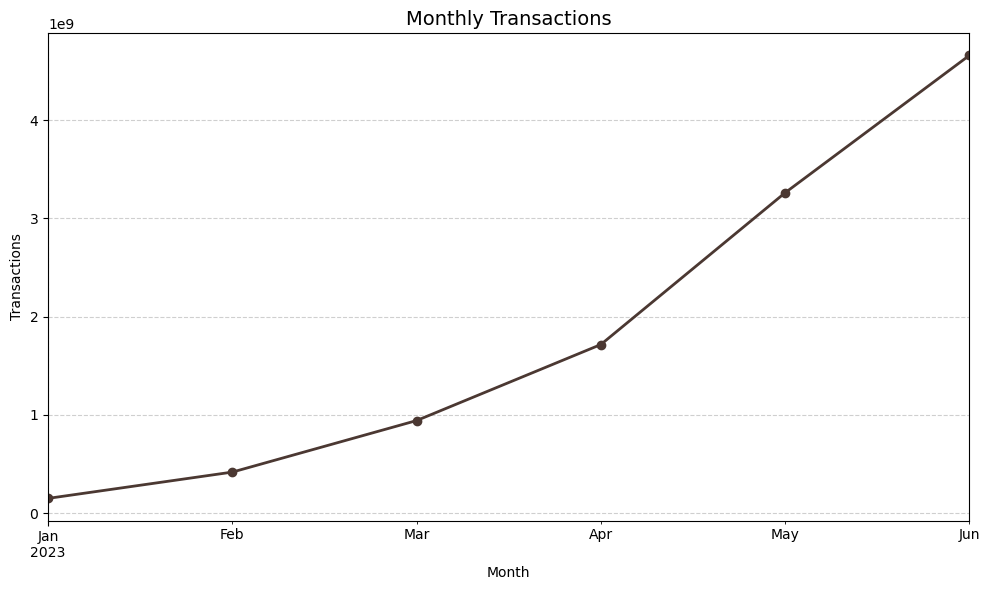

In [112]:
import matplotlib.pyplot as plt

# If you want count of transactions (instead of summing IDs)
# trans = df.groupby(df.transaction_date.dt.to_period('M'))["transaction_id"].count()

trans = df.groupby(df.transaction_date.dt.to_period('M'))["transaction_id"].sum()

plt.figure(figsize=(10,6))
trans.plot(
    kind='line',
    color="#4B3832",   # deep brown shade
    marker="o",
    linewidth=2,
    markersize=6
)

plt.title("Monthly Transactions", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Transactions")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


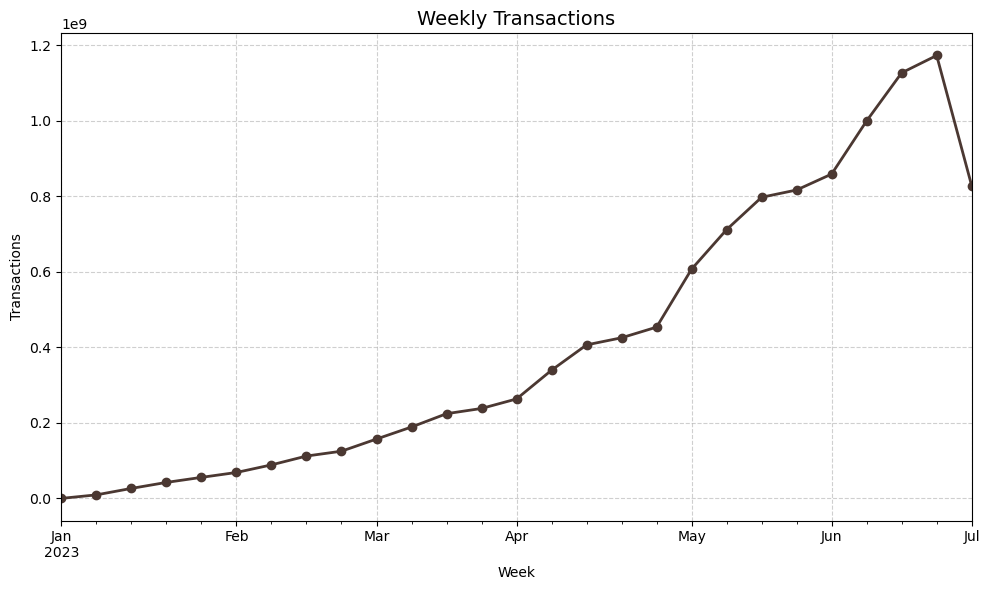

In [113]:


weektrans = df.groupby(df.transaction_date.dt.to_period('W'))["transaction_id"].sum()

plt.figure(figsize=(10,6))
weektrans.plot(
    kind='line',
    color="#4B3832",   # deep brown shade
    marker="o",
    linewidth=2,
    markersize=6
)

plt.title("Weekly Transactions", fontsize=14)
plt.xlabel("Week")
plt.ylabel("Transactions")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [114]:
jan= df[df.month_name=='January']

transaction_date
2022-12-26/2023-01-01      151525
2023-01-02/2023-01-08     9453571
2023-01-09/2023-01-15    26574093
2023-01-16/2023-01-22    42433428
2023-01-23/2023-01-29    55780869
2023-01-30/2023-02-05    15910296
Freq: W-SUN, Name: transaction_id, dtype: int64

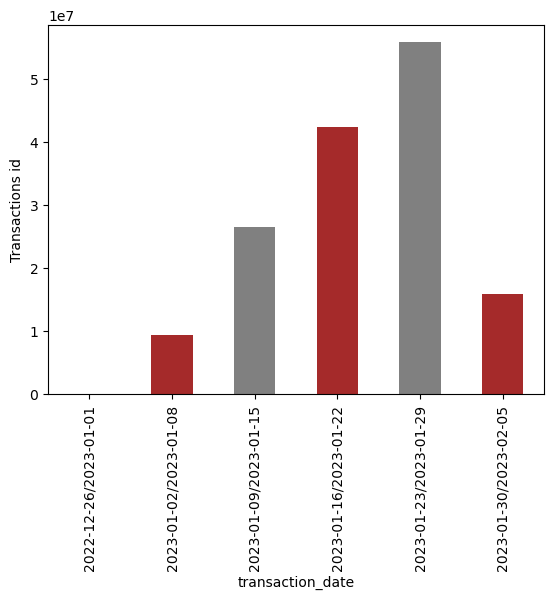

In [115]:
transaction_jan= jan.groupby(jan.transaction_date.dt.to_period('W'))["transaction_id"].sum()
display(transaction_jan)
transaction_jan.plot(kind='bar', color=['grey','brown'])
plt.ylabel("Transactions id")
plt.show()

In [116]:
april= df[df.month_name=='April']

transaction_date
2023-03-27/2023-04-02     91112112
2023-04-03/2023-04-09    339458085
2023-04-10/2023-04-16    406483345
2023-04-17/2023-04-23    425343215
2023-04-24/2023-04-30    453493580
Freq: W-SUN, Name: transaction_id, dtype: int64

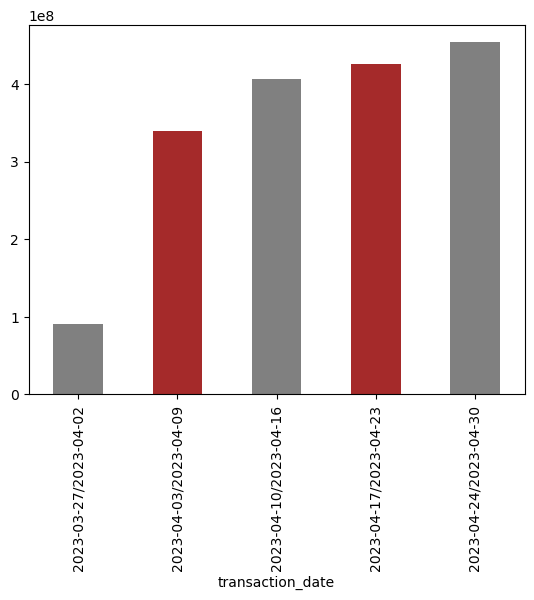

In [117]:
transaction_april= april.groupby(april.transaction_date.dt.to_period('W'))["transaction_id"].sum()
display(transaction_april)
transaction_april.plot(kind='bar', color=['grey','brown'])
plt.show()

In [118]:
june= df[df.month_name=='June']

transaction_date
2023-05-29/2023-06-04     531183203
2023-06-05/2023-06-11     999555975
2023-06-12/2023-06-18    1126755043
2023-06-19/2023-06-25    1172694600
2023-06-26/2023-07-02     827874537
Freq: W-SUN, Name: transaction_id, dtype: int64

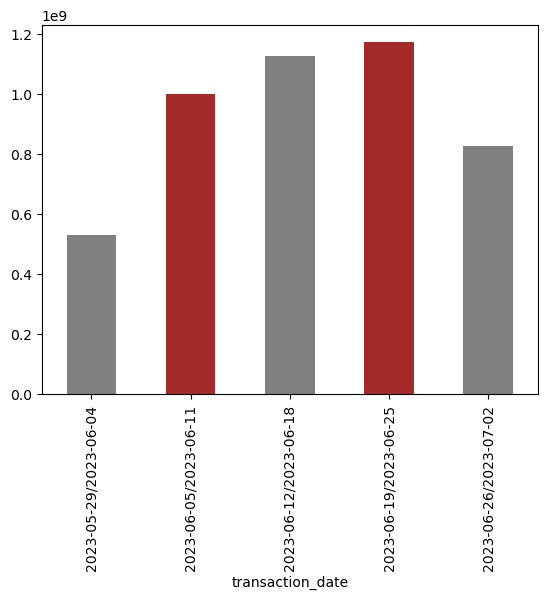

In [119]:
transaction_june= june.groupby(june.transaction_date.dt.to_period('W'))["transaction_id"].sum()
display(transaction_june)
transaction_june.plot(kind='bar',color=['grey','brown'])
plt.show()

In [120]:
#sum of sales 

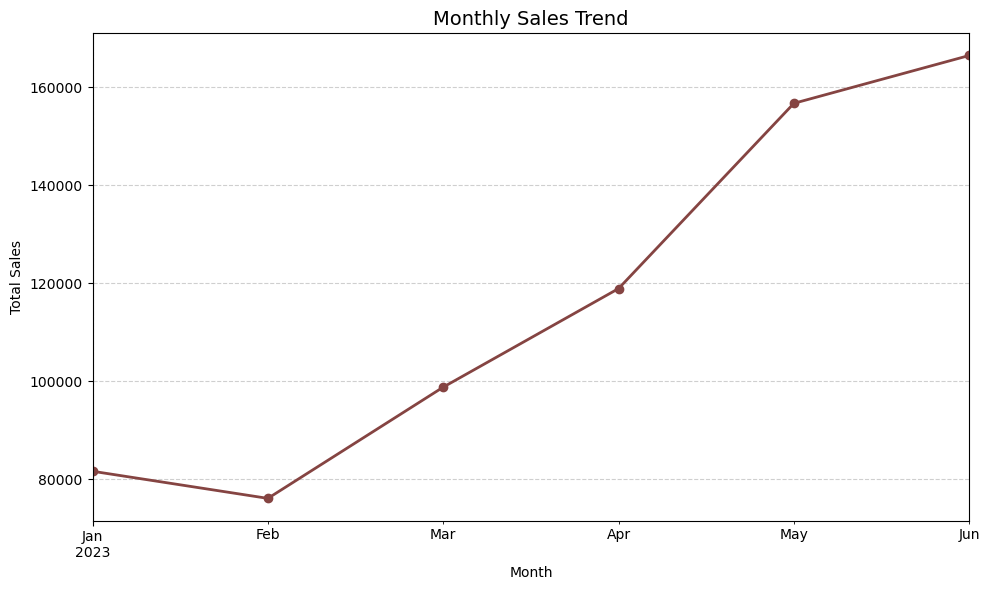

In [121]:
sal = df.groupby(df.transaction_date.dt.to_period('M'))["sales"].sum()

plt.figure(figsize=(10,6))
sal.plot(
    kind='line',
    color="#854442",    # warm brown (you can swap with grey if preferred)
    marker="o",
    linewidth=2,
    markersize=6
)

plt.title("Monthly Sales Trend", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


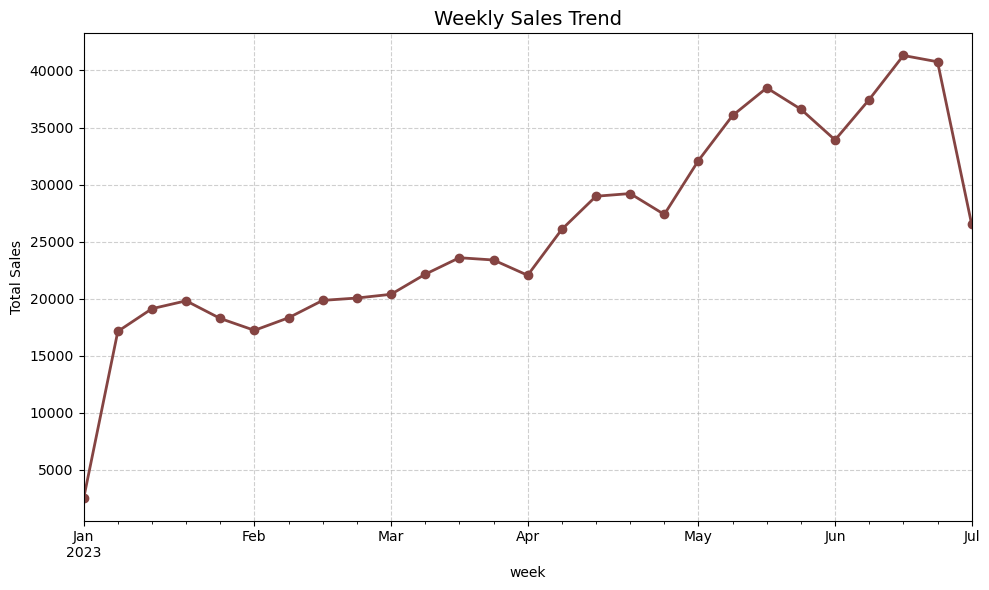

In [122]:
weeksal = df.groupby(df.transaction_date.dt.to_period('W'))["sales"].sum()

plt.figure(figsize=(10,6))
weeksal.plot(
    kind='line',
    color="#854442",    # warm brown (you can swap with grey if preferred)
    marker="o",
    linewidth=2,
    markersize=6
)

plt.title("Weekly Sales Trend", fontsize=14)
plt.xlabel("week")
plt.ylabel("Total Sales")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [123]:
## average of monthly sales

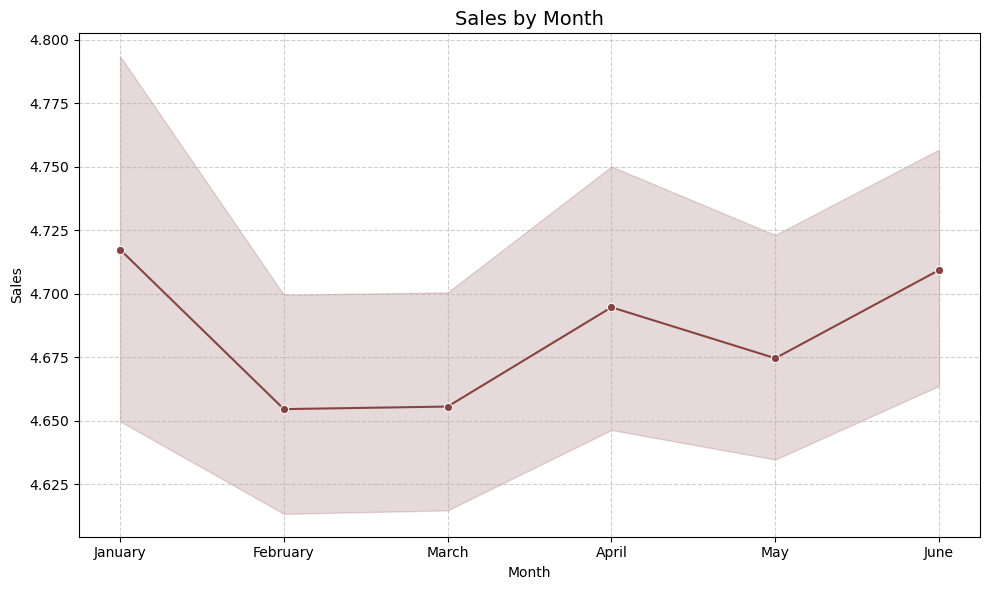

In [124]:
import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sb.lineplot(x=df.month_name, y=df.sales, color="#854442", marker="o")  # warm brown
plt.title("Sales by Month", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [125]:
jan.sales.sum()

81677.74

transaction_date
2022-12-26/2023-01-01     2508.20
2023-01-02/2023-01-08    17139.33
2023-01-09/2023-01-15    19129.53
2023-01-16/2023-01-22    19818.51
2023-01-23/2023-01-29    18271.63
2023-01-30/2023-02-05     4810.54
Freq: W-SUN, Name: sales, dtype: float64

<Axes: xlabel='transaction_date'>

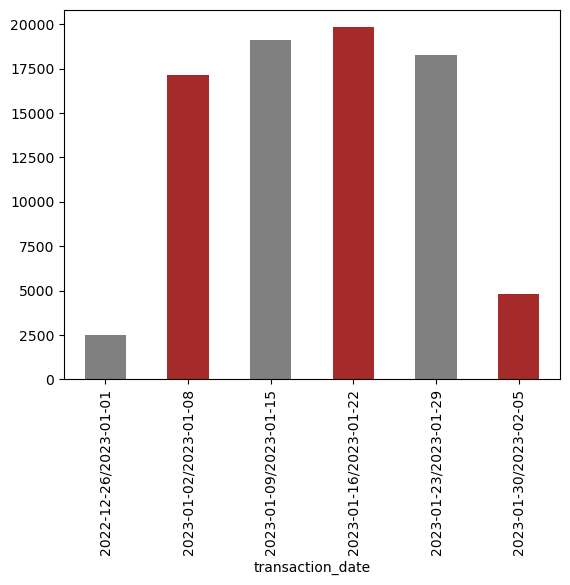

In [126]:
sales_jan= jan.groupby(jan.transaction_date.dt.to_period('W'))["sales"].sum()
display(sales_jan)
sales_jan.plot(kind='bar',color=['grey','brown'])

In [127]:
april= df[df.month_name=='April']
april

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,sales,month_name,week_name
54902,55013,2023-04-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.00,April,Saturday
54903,55014,2023-04-01,07:07:09,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.00,April,Saturday
54904,55015,2023-04-01,07:07:19,1,5,Lower Manhattan,61,4.75,Drinking Chocolate,Hot chocolate,Sustainably Grown Organic Lg,4.75,April,Saturday
54905,55016,2023-04-01,07:09:09,1,5,Lower Manhattan,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,3.00,April,Saturday
54906,55017,2023-04-01,07:09:59,2,5,Lower Manhattan,61,4.75,Drinking Chocolate,Hot chocolate,Sustainably Grown Organic Lg,9.50,April,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80232,80406,2023-04-30,19:58:35,1,3,Astoria,37,3.00,Coffee,Barista Espresso,Espresso shot,3.00,April,Sunday
80233,80407,2023-04-30,20:32:15,2,8,Hell's Kitchen,33,3.50,Coffee,Gourmet brewed coffee,Ethiopia Lg,7.00,April,Sunday
80234,80408,2023-04-30,20:52:03,1,8,Hell's Kitchen,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,4.50,April,Sunday
80235,80409,2023-04-30,20:57:11,2,8,Hell's Kitchen,60,3.75,Drinking Chocolate,Hot chocolate,Sustainably Grown Organic Rg,7.50,April,Sunday


transaction_date
2023-03-27/2023-04-02     7275.75
2023-04-03/2023-04-09    26079.89
2023-04-10/2023-04-16    28981.30
2023-04-17/2023-04-23    29217.51
2023-04-24/2023-04-30    27386.63
Freq: W-SUN, Name: sales, dtype: float64

<Axes: xlabel='transaction_date'>

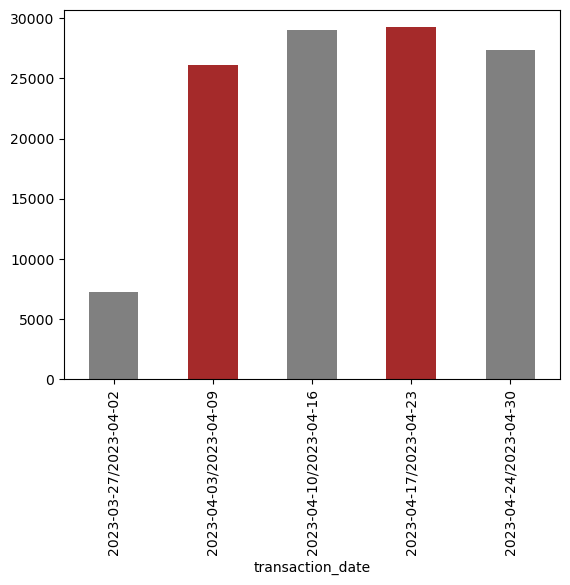

In [128]:
sales_april= april.groupby(april.transaction_date.dt.to_period('W'))["sales"].sum()
display(sales_april)
sales_april.plot(kind='bar', color=['grey','brown'])

In [129]:
june= df[df.month_name=='June']
june

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,sales,month_name,week_name
113764,114026,2023-06-01,07:01:20,2,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,4.00,June,Thursday
113765,114027,2023-06-01,07:02:34,2,5,Lower Manhattan,30,3.00,Coffee,Gourmet brewed coffee,Columbian Medium Roast Lg,6.00,June,Thursday
113766,114028,2023-06-01,07:03:30,2,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,4.00,June,Thursday
113767,114029,2023-06-01,07:04:24,1,5,Lower Manhattan,37,3.00,Coffee,Barista Espresso,Espresso shot,3.00,June,Thursday
113768,114030,2023-06-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.00,June,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,5.00,June,Friday
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,6.00,June,Friday
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,3.00,June,Friday
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,3.75,June,Friday


transaction_date
2023-05-29/2023-06-04    20435.30
2023-06-05/2023-06-11    37457.26
2023-06-12/2023-06-18    41315.94
2023-06-19/2023-06-25    40764.86
2023-06-26/2023-07-02    26512.52
Freq: W-SUN, Name: sales, dtype: float64

<Axes: xlabel='transaction_date'>

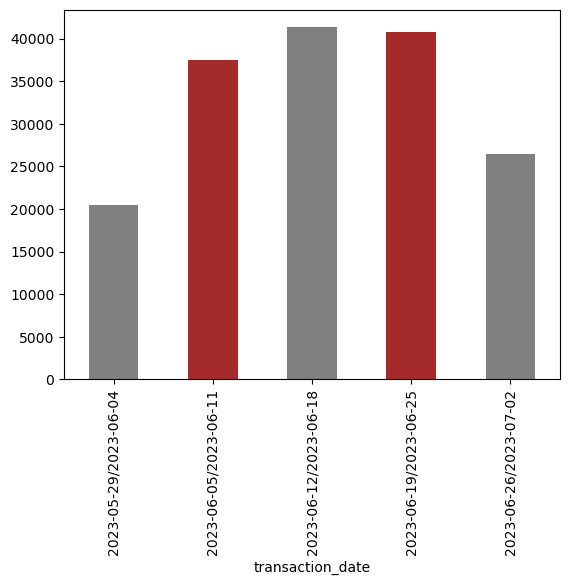

In [130]:
sales_june= june.groupby(june.transaction_date.dt.to_period('W'))["sales"].sum()
display(sales_june)
sales_june.plot(kind='bar', color=['grey','brown'])

In [131]:
hell= df[df.store_location=="Hell's Kitchen"]
lm= df[df.store_location=='Lower Manhattan']
asto= df[df.store_location=='Astoria']

In [132]:
store1= hell.groupby(hell.transaction_date.dt.to_period('M'))["sales"].sum()
display(store1)

transaction_date
2023-01    27820.65
2023-02    25719.80
2023-03    33110.57
2023-04    40304.14
2023-05    52598.93
2023-06    56957.08
Freq: M, Name: sales, dtype: float64

In [133]:
store2= lm.groupby(lm.transaction_date.dt.to_period('M'))["sales"].sum()
display(store2)

transaction_date
2023-01    26543.43
2023-02    25320.05
2023-03    32888.68
2023-04    39159.33
2023-05    51700.07
2023-06    54445.69
Freq: M, Name: sales, dtype: float64

In [134]:
store3= asto.groupby(asto.transaction_date.dt.to_period('M'))["sales"].sum()
display(store3)

transaction_date
2023-01    27313.66
2023-02    25105.34
2023-03    32835.43
2023-04    39477.61
2023-05    52428.76
2023-06    55083.11
Freq: M, Name: sales, dtype: float64

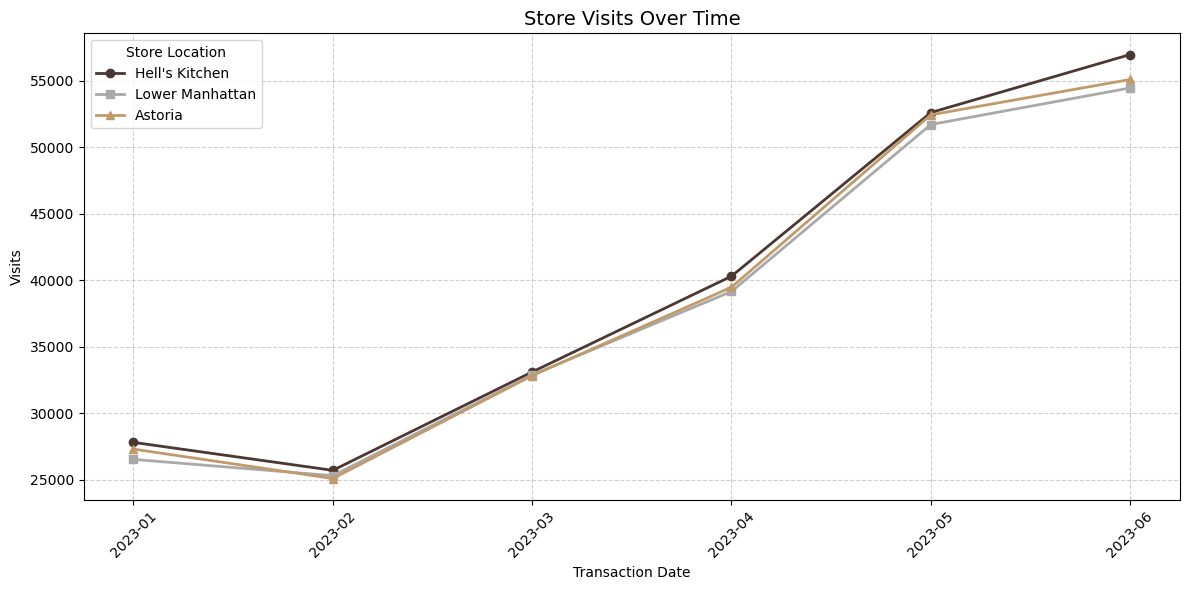

In [135]:
plt.figure(figsize=(12, 6))
plt.grid(True, linestyle="--", alpha=0.6)

plt.plot(
    store1.index.astype(str), store1.values,
    color="#4B3832", marker="o", linewidth=2,
    label="Hell's Kitchen"
)

plt.plot(
    store2.index.astype(str), store2.values,
    color="#A9A9A9", marker="s", linewidth=2,
    label="Lower Manhattan"
)

plt.plot(
    store3.index.astype(str), store3.values,
    color="#C19A6B", marker="^", linewidth=2,
    label="Astoria"
)

plt.title("Store Visits Over Time", fontsize=14)
plt.xlabel("Transaction Date")
plt.ylabel("Visits")
plt.xticks(rotation=45)
plt.legend(title="Store Location")
plt.tight_layout()
plt.show()


In [136]:
hsale= hell.groupby(hell.transaction_date.dt.to_period('M'))['sales'].sum()
hmonthly_growth=hsale.pct_change()*100
hmonthly_growth

transaction_date
2023-01          NaN
2023-02    -7.551405
2023-03    28.735721
2023-04    21.725902
2023-05    30.505030
2023-06     8.285625
Freq: M, Name: sales, dtype: float64

<Axes: xlabel='transaction_date'>

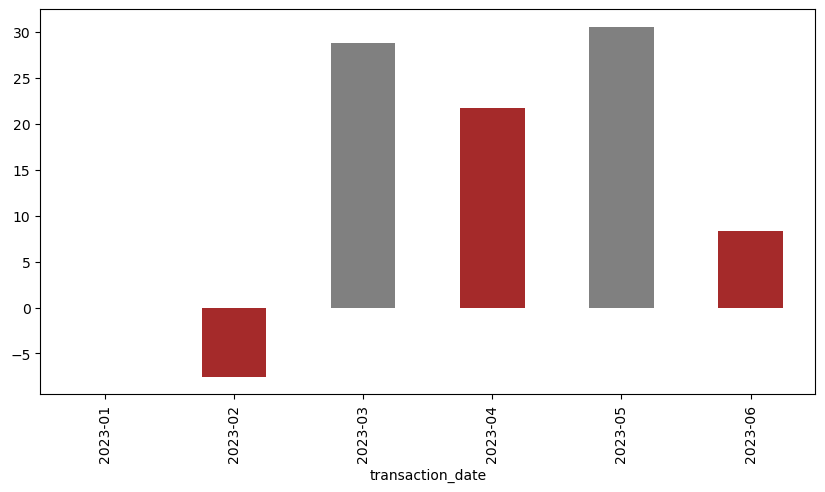

In [137]:
hmonthly_growth.plot(kind='bar',figsize=(10,5), color=['grey','brown'])

In [138]:
lmsale= lm.groupby(lm.transaction_date.dt.to_period('M'))['sales'].sum()
lmmonthly_growth=lmsale.pct_change()*100
lmmonthly_growth

transaction_date
2023-01          NaN
2023-02    -4.608975
2023-03    29.891845
2023-04    19.066287
2023-05    32.024910
2023-06     5.310670
Freq: M, Name: sales, dtype: float64

<Axes: xlabel='transaction_date'>

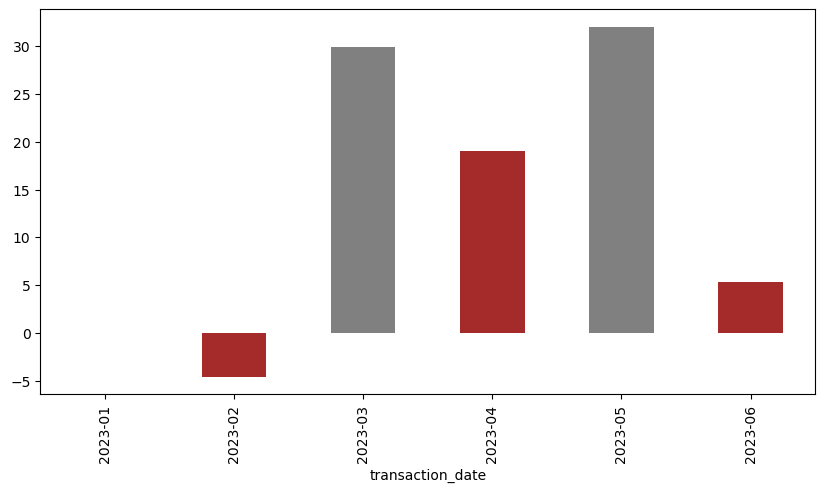

In [139]:
lmmonthly_growth.plot(kind='bar',figsize=(10,5),color=['grey','brown'])

In [140]:
astosale= asto.groupby(asto.transaction_date.dt.to_period('M'))['sales'].sum()
amonthly_growth=astosale.pct_change()*100
amonthly_growth

transaction_date
2023-01          NaN
2023-02    -8.085039
2023-03    30.790621
2023-04    20.228698
2023-05    32.806317
2023-06     5.062775
Freq: M, Name: sales, dtype: float64

<Axes: xlabel='transaction_date'>

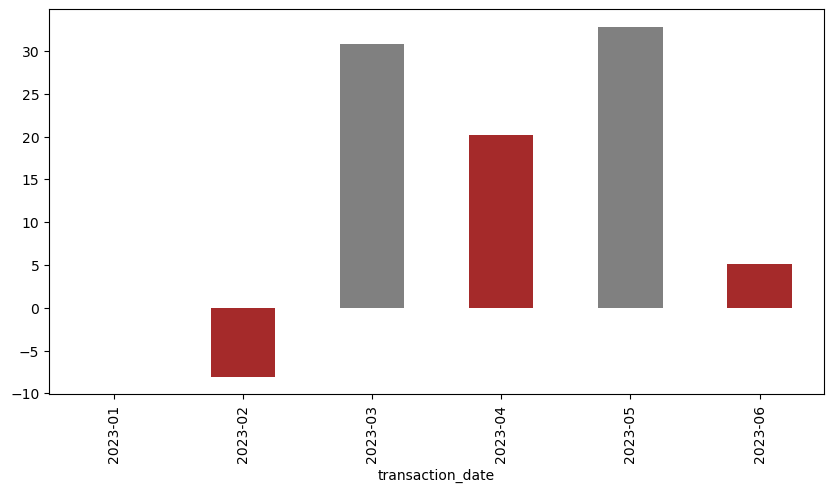

In [141]:
amonthly_growth.plot(kind='bar',figsize=(10,5),color=['grey','brown'])

In [142]:
store=df.groupby(["store_location","transaction_date"]).size().reset_index(name='count')
store

,store_location,transaction_date,count
0,Astoria,2023-01-01,190
1,Astoria,2023-01-02,212
2,Astoria,2023-01-03,205
3,Astoria,2023-01-04,187
4,Astoria,2023-01-05,198
...,...,...,...
538,Lower Manhattan,2023-06-26,376
539,Lower Manhattan,2023-06-27,442
540,Lower Manhattan,2023-06-28,343
541,Lower Manhattan,2023-06-29,305


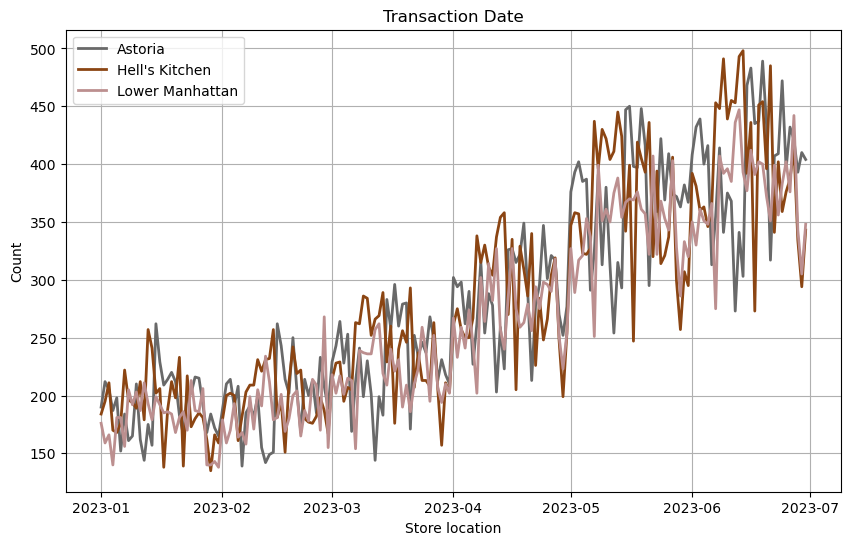

In [143]:
plt.figure(figsize=(10, 6)) # Adjust figure size as needed
colors = [
     "dimgray",       # deep grey
    "saddlebrown",   # rich brown
    "rosybrown",     # soft brownish-pink    
    "peru",          # warm brown-orange
    "darkslategray", # grey with blue tone
    "tan",           # muted beige
    "slategray",     # cool grey
    "chocolate"    # Cyan
]

for i, category in enumerate (store['store_location'].unique()):
    subset = store[store['store_location'] == category]
    plt.plot(subset['transaction_date'], subset['count'],
              color=colors[i % len(colors)],   # line color
                           # circle points
        linestyle='-',                   # solid line
        linewidth=2,
        markersize=6,label=category)

plt.xlabel("Store location")
plt.ylabel("Count")
plt.title("Transaction Date")
plt.legend()
plt.grid(True) # Adds a grid to the plot for better readability
plt.show()

In [144]:
dfgrouped = df.groupby('product_category')['product_type'].value_counts()
dfgrouped

product_category    product_type         
Bakery              Scone                    10173
                    Pastry                    6912
                    Biscotti                  5711
Branded             Housewares                 526
                    Clothing                   221
Coffee              Gourmet brewed coffee    16912
                    Barista Espresso         16403
                    Organic brewed coffee     8489
                    Drip coffee               8477
                    Premium brewed coffee     8135
Coffee beans        Organic Beans              415
                    Gourmet Beans              366
                    Premium Beans              336
                    Espresso Beans             319
                    House blend Beans          183
                    Green beans                134
Drinking Chocolate  Hot chocolate            11468
Flavours            Regular syrup             4979
                    Sugar free syrup    

In [145]:
cof=dfgrouped['Coffee']
cof

product_type
Gourmet brewed coffee    16912
Barista Espresso         16403
Organic brewed coffee     8489
Drip coffee               8477
Premium brewed coffee     8135
Name: count, dtype: int64

In [146]:
coffe=df[df.product_category=="Coffee"]
coffe

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,sales,month_name,week_name
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.00,January,Sunday
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00,January,Sunday
6,7,2023-01-01,07:25:49,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00,January,Sunday
7,8,2023-01-01,07:33:34,2,5,Lower Manhattan,28,2.00,Coffee,Gourmet brewed coffee,Columbian Medium Roast Sm,4.00,January,Sunday
8,9,2023-01-01,07:39:13,1,5,Lower Manhattan,39,4.25,Coffee,Barista Espresso,Latte Rg,4.25,January,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149103,149444,2023-06-30,19:51:59,2,3,Astoria,26,3.00,Coffee,Organic brewed coffee,Brazilian Rg,6.00,June,Friday
149104,149445,2023-06-30,19:52:28,2,3,Astoria,34,2.45,Coffee,Premium brewed coffee,Jamaican Coffee River Sm,4.90,June,Friday
149105,149446,2023-06-30,19:53:46,1,3,Astoria,24,3.00,Coffee,Drip coffee,Our Old Time Diner Blend Lg,3.00,June,Friday
149106,149447,2023-06-30,19:56:45,1,8,Hell's Kitchen,33,3.50,Coffee,Gourmet brewed coffee,Ethiopia Lg,3.50,June,Friday


In [147]:
coffe.transaction_date.unique()

<DatetimeArray>
['2023-01-01 00:00:00', '2023-01-02 00:00:00', '2023-01-03 00:00:00',
 '2023-01-04 00:00:00', '2023-01-05 00:00:00', '2023-01-06 00:00:00',
 '2023-01-07 00:00:00', '2023-01-08 00:00:00', '2023-01-09 00:00:00',
 '2023-01-10 00:00:00',
 ...
 '2023-06-21 00:00:00', '2023-06-22 00:00:00', '2023-06-23 00:00:00',
 '2023-06-24 00:00:00', '2023-06-25 00:00:00', '2023-06-26 00:00:00',
 '2023-06-27 00:00:00', '2023-06-28 00:00:00', '2023-06-29 00:00:00',
 '2023-06-30 00:00:00']
Length: 181, dtype: datetime64[ns]

In [148]:
x=df.groupby(["transaction_date","product_category"]).size().reset_index(name='count')
x

,transaction_date,product_category,count
0,2023-01-01,Bakery,68
1,2023-01-01,Coffee,241
2,2023-01-01,Drinking Chocolate,50
3,2023-01-01,Tea,191
4,2023-01-02,Bakery,87
...,...,...,...
1368,2023-06-30,Drinking Chocolate,74
1369,2023-06-30,Flavours,76
1370,2023-06-30,Loose Tea,9
1371,2023-06-30,Packaged Chocolate,8


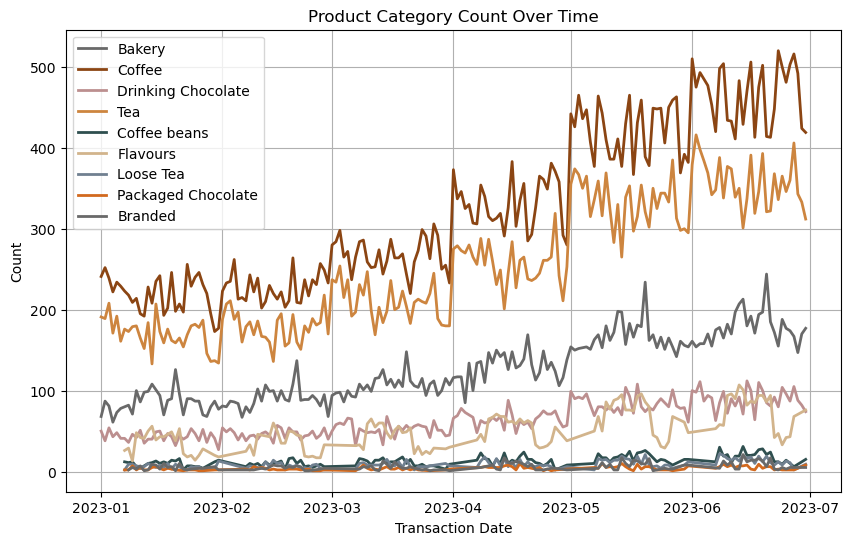

In [149]:
plt.figure(figsize=(10, 6)) # Adjust figure size as needed
colors = [
     "dimgray",       # deep grey
    "saddlebrown",   # rich brown
    "rosybrown",     # soft brownish-pink    
    "peru",          # warm brown-orange
    "darkslategray", # grey with blue tone
    "tan",           # muted beige
    "slategray",     # cool grey
    "chocolate"    # Cyan
]
for i, category in enumerate (x['product_category'].unique()):
    subset = x[x['product_category'] == category]
    plt.plot(subset['transaction_date'], subset['count'], 
             color=colors[i % len(colors)],   # line color
                             # circle points
        linestyle='-',                   # solid line
        linewidth=2,
        markersize=6,
        label=category)

plt.xlabel("Transaction Date")
plt.ylabel("Count")
plt.title("Product Category Count Over Time")
plt.legend()
plt.grid(True) # Adds a grid to the plot for better readability
plt.show()


In [150]:
coffe.sales.sum()

269952.44999999995

In [151]:
j=jan.groupby(["transaction_date","product_category"]).size().reset_index(name='count')
j

,transaction_date,product_category,count
0,2023-01-01,Bakery,68
1,2023-01-01,Coffee,241
2,2023-01-01,Drinking Chocolate,50
3,2023-01-01,Tea,191
4,2023-01-02,Bakery,87
...,...,...,...
229,2023-01-31,Coffee beans,14
230,2023-01-31,Drinking Chocolate,27
231,2023-01-31,Flavours,18
232,2023-01-31,Loose Tea,13


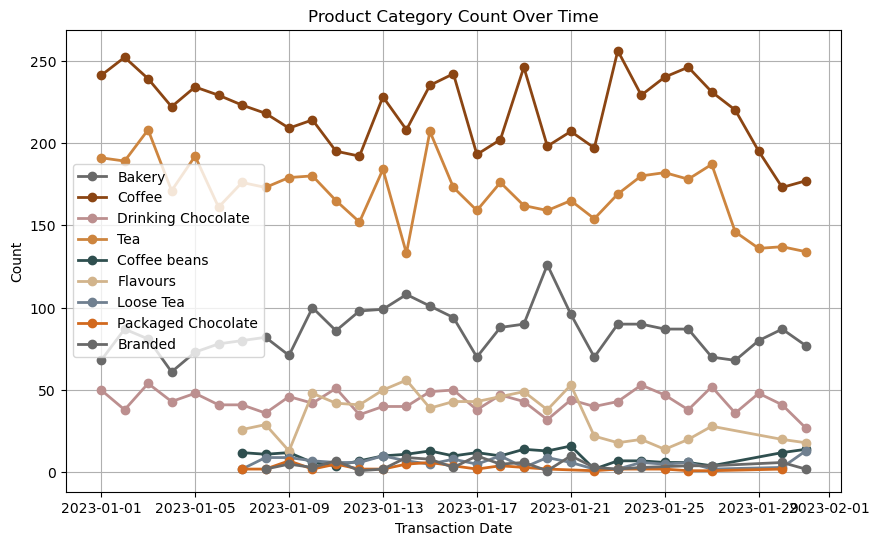

In [152]:
plt.figure(figsize=(10, 6))# Adjust figure size as needed
colors = [
     "dimgray",       # deep grey
    "saddlebrown",   # rich brown
    "rosybrown",     # soft brownish-pink    
    "peru",          # warm brown-orange
    "darkslategray", # grey with blue tone
    "tan",           # muted beige
    "slategray",     # cool grey
    "chocolate"    # Cyan
]
for i, category in enumerate (j['product_category'].unique()):
    subset = j[j['product_category'] == category]
    plt.plot(subset['transaction_date'], subset['count'], 
             color=colors[i % len(colors)],   # line color
        marker='o',                      # circle points
        linestyle='-',                   # solid line
        linewidth=2,
        markersize=6,
        label=category)

plt.xlabel("Transaction Date")
plt.ylabel("Count")
plt.title("Product Category Count Over Time")
plt.legend()
plt.grid(True) # Adds a grid to the plot for better readability
plt.show()

In [153]:
x.dtypes

transaction_date    datetime64[ns]
product_category            object
count                        int64
dtype: object

In [154]:
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
sales               0
month_name          0
week_name           0
dtype: int64

In [155]:
df.dtypes

transaction_id               int64
transaction_date    datetime64[ns]
transaction_time            object
transaction_qty              int64
store_id                     int64
store_location              object
product_id                   int64
unit_price                 float64
product_category            object
product_type                object
product_detail              object
sales                      float64
month_name                  object
week_name                   object
dtype: object

In [156]:
df.month_name.unique()

array(['January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [157]:
df.transaction_time= pd.to_datetime(df['transaction_time'],format="%H:%M:%S")

In [158]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
149111    False
149112    False
149113    False
149114    False
149115    False
Length: 149116, dtype: bool

In [159]:
hell= df[df.store_location=="Hell's Kitchen"]
hell

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,sales,month_name,week_name
17,18,2023-01-01,1900-01-01 08:00:18,1,8,Hell's Kitchen,42,2.50,Tea,Brewed herbal tea,Lemon Grass Rg,2.50,January,Sunday
18,19,2023-01-01,1900-01-01 08:00:39,2,8,Hell's Kitchen,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.00,January,Sunday
19,20,2023-01-01,1900-01-01 08:11:45,1,8,Hell's Kitchen,61,4.75,Drinking Chocolate,Hot chocolate,Sustainably Grown Organic Lg,4.75,January,Sunday
20,21,2023-01-01,1900-01-01 08:17:27,2,8,Hell's Kitchen,33,3.50,Coffee,Gourmet brewed coffee,Ethiopia Lg,7.00,January,Sunday
23,24,2023-01-01,1900-01-01 08:29:38,1,8,Hell's Kitchen,56,2.55,Tea,Brewed Chai tea,Spicy Eye Opener Chai Rg,2.55,January,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,1900-01-01 20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,5.00,June,Friday
149112,149453,2023-06-30,1900-01-01 20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,6.00,June,Friday
149113,149454,2023-06-30,1900-01-01 20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,3.00,June,Friday
149114,149455,2023-06-30,1900-01-01 20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,3.75,June,Friday


In [160]:
hell_grouped = hell.groupby('product_category')['product_type'].value_counts()
hell_grouped

product_category    product_type         
Bakery              Scone                    3462
                    Pastry                   2300
                    Biscotti                 1855
Branded             Housewares                 95
                    Clothing                   24
Coffee              Barista Espresso         6153
                    Gourmet brewed coffee    5642
                    Organic brewed coffee    2998
                    Drip coffee              2884
                    Premium brewed coffee    2510
Coffee beans        Organic Beans             162
                    Premium Beans             147
                    Espresso Beans            145
                    Gourmet Beans             118
                    House blend Beans          89
                    Green beans                59
Drinking Chocolate  Hot chocolate            3763
Flavours            Regular syrup            1768
                    Sugar free syrup          602
Loose Te

In [161]:
hell_grouped['Bakery']

product_type
Scone       3462
Pastry      2300
Biscotti    1855
Name: count, dtype: int64

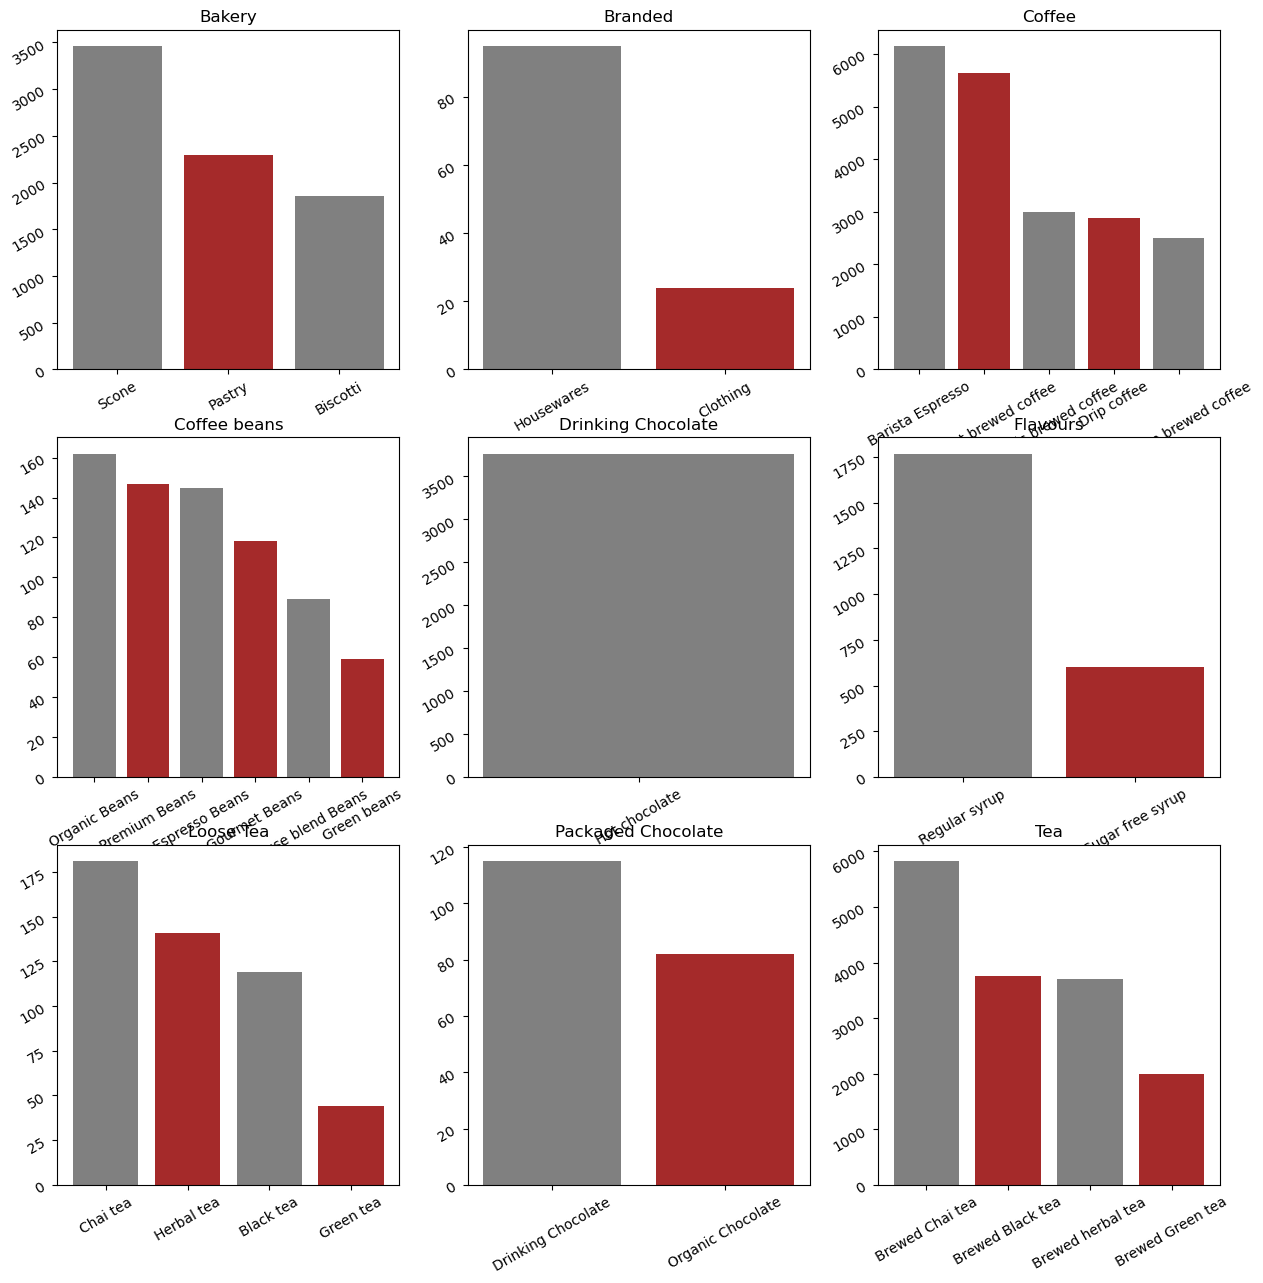

In [162]:
categories = hell_grouped.unstack().index.tolist()
fig, axes = plt.subplots(3, 3, figsize=(15,15))
axes = axes.flatten()

for i, items in enumerate(categories):
    axes[i].bar(hell_grouped[items].index, hell_grouped[items].values,color=['grey','brown'])
    axes[i].tick_params(rotation=30)
    axes[i].set_title(items)

In [215]:
lm= df[df.store_location=='Lower Manhattan']

In [217]:
lm_grouped = lm.groupby('product_category')['product_type'].value_counts()
lm_grouped

product_category    product_type         
Bakery              Scone                    3506
                    Pastry                   2409
                    Biscotti                 1975
Branded             Housewares                263
                    Clothing                   86
Coffee              Barista Espresso         5320
                    Gourmet brewed coffee    5217
                    Premium brewed coffee    2617
                    Organic brewed coffee    2575
                    Drip coffee              2475
Coffee beans        Organic Beans             162
                    Gourmet Beans             116
                    Premium Beans              93
                    Espresso Beans             77
                    House blend Beans          48
                    Green beans                35
Drinking Chocolate  Hot chocolate            3405
Flavours            Regular syrup            2100
                    Sugar free syrup          830
Loose Te

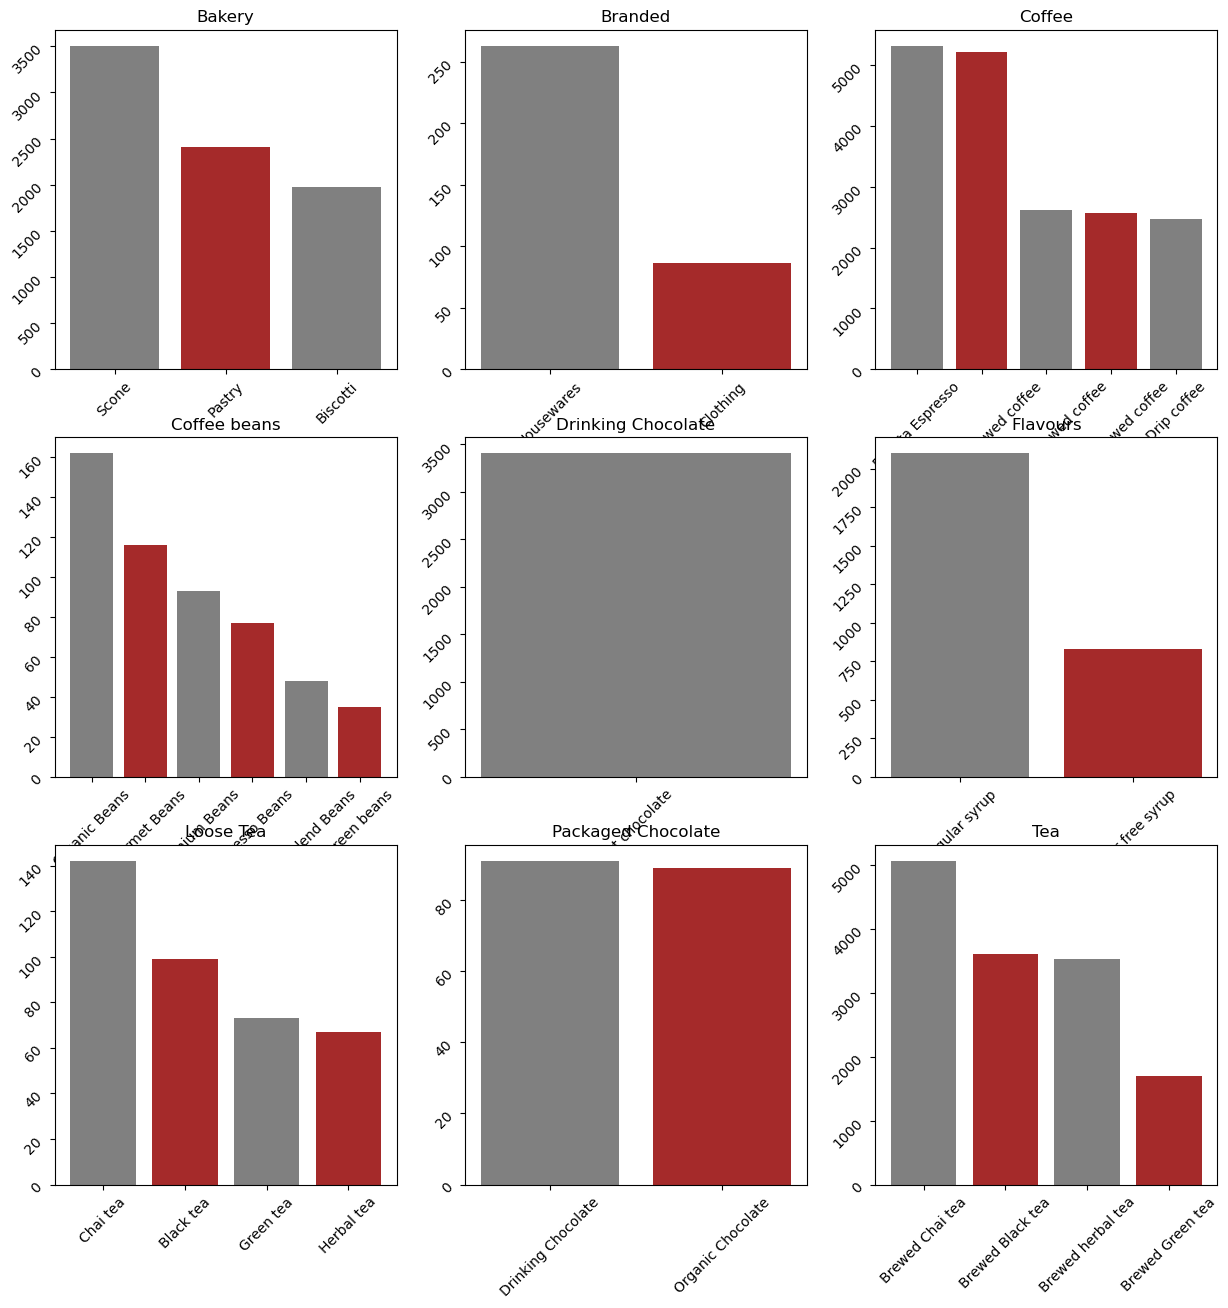

In [218]:
lmcategories = lm_grouped.unstack().index.tolist()

fig, axes = plt.subplots(3, 3, figsize=(15,15))

axes = axes.flatten()

for i, items in enumerate(lmcategories):
    axes[i].bar(lm_grouped[items].index, lm_grouped[items].values, color=['grey','brown'])
    axes[i].tick_params(rotation=45)
    axes[i].set_title(items)

In [219]:
asto= df[df.store_location=='Astoria']

In [220]:
asto_grouped = asto.groupby('product_category')['product_type'].value_counts()
asto_grouped

product_category    product_type         
Bakery              Scone                    3205
                    Pastry                   2203
                    Biscotti                 1881
Branded             Housewares                168
                    Clothing                  111
Coffee              Gourmet brewed coffee    6053
                    Barista Espresso         4930
                    Drip coffee              3118
                    Premium brewed coffee    3008
                    Organic brewed coffee    2916
Coffee beans        Gourmet Beans             132
                    Espresso Beans             97
                    Premium Beans              96
                    Organic Beans              91
                    House blend Beans          46
                    Green beans                40
Drinking Chocolate  Hot chocolate            4300
Flavours            Regular syrup            1111
                    Sugar free syrup          379
Loose Te

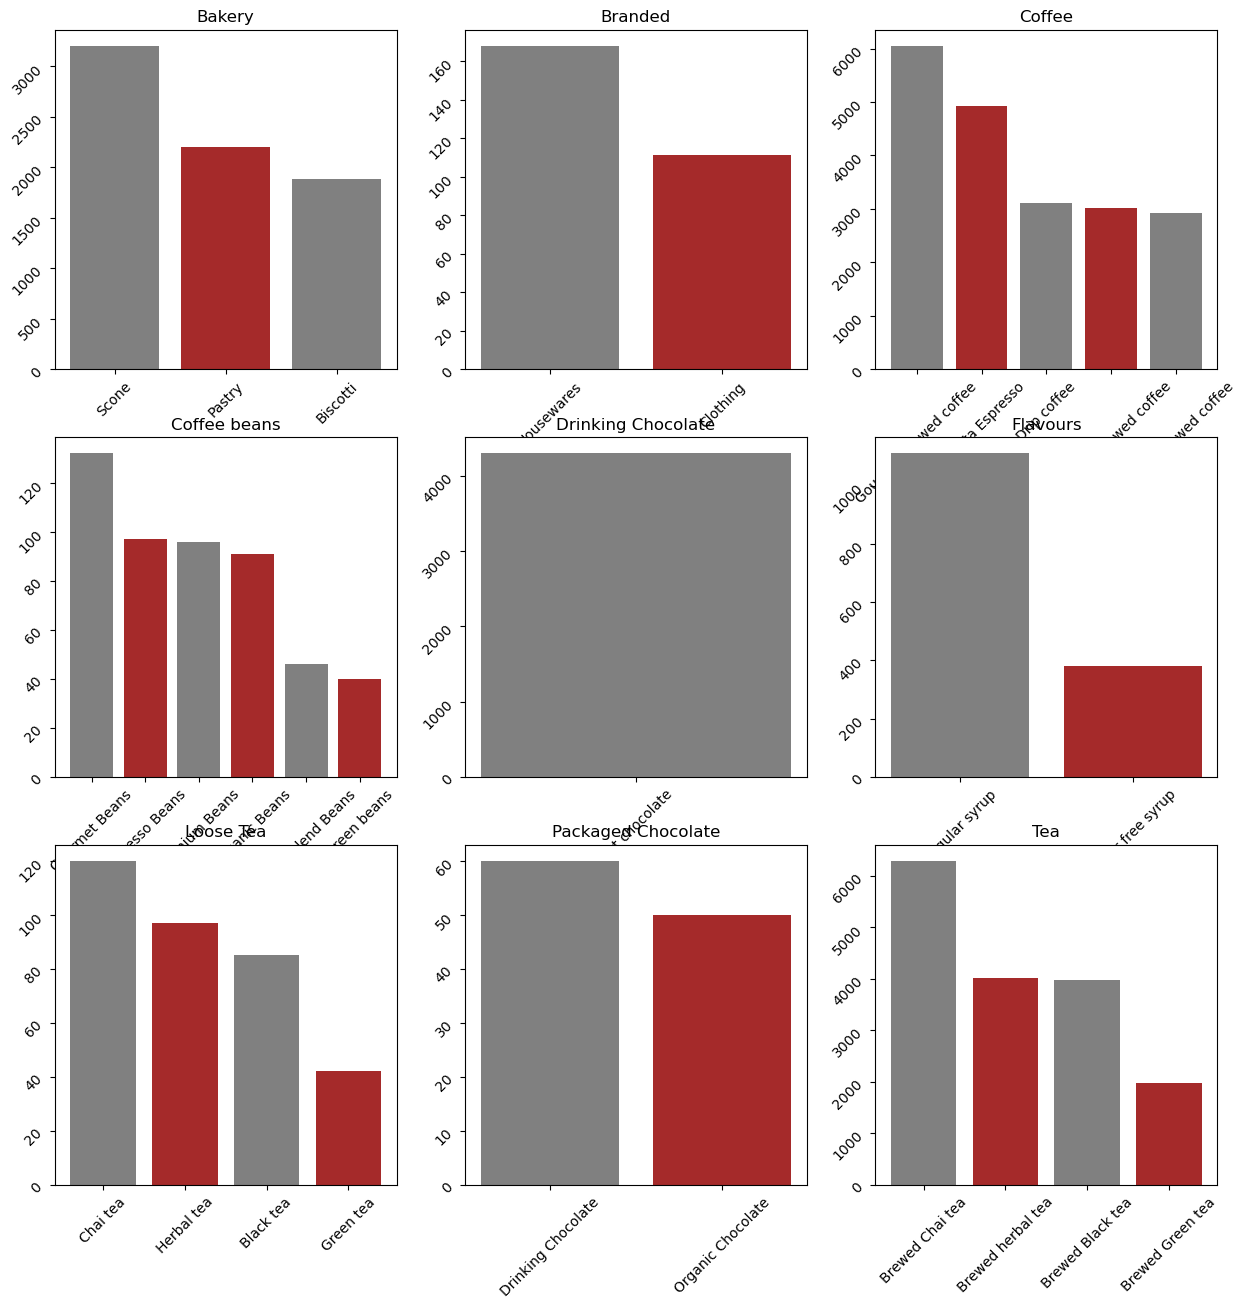

In [221]:
astocategories = asto_grouped.unstack().index.tolist()

fig, axes = plt.subplots(3, 3, figsize=(15,15))

axes = axes.flatten()

for i, items in enumerate(astocategories):
    axes[i].bar(asto_grouped[items].index, asto_grouped[items].values, color=['grey','brown'])
    axes[i].tick_params(rotation=45)
    axes[i].set_title(items)

In [222]:
jan= df[df.month_name=='January']
jan

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,sales,month_name,week_name
0,1,2023-01-01,1900-01-01 07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.00,January,Sunday
1,2,2023-01-01,1900-01-01 07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,January,Sunday
2,3,2023-01-01,1900-01-01 07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.00,January,Sunday
3,4,2023-01-01,1900-01-01 07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00,January,Sunday
4,5,2023-01-01,1900-01-01 07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,January,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17309,17339,2023-01-31,1900-01-01 19:53:46,1,3,Astoria,24,3.00,Coffee,Drip coffee,Our Old Time Diner Blend Lg,3.00,January,Tuesday
17310,17340,2023-01-31,1900-01-01 19:54:33,1,3,Astoria,53,3.00,Tea,Brewed Chai tea,Traditional Blend Chai Lg,3.00,January,Tuesday
17311,17341,2023-01-31,1900-01-01 20:00:57,2,8,Hell's Kitchen,55,4.00,Tea,Brewed Chai tea,Morning Sunrise Chai Lg,8.00,January,Tuesday
17312,17342,2023-01-31,1900-01-01 20:00:57,1,8,Hell's Kitchen,71,3.75,Bakery,Pastry,Chocolate Croissant,3.75,January,Tuesday


In [223]:
jan_grouped = jan.groupby('product_category')['product_type'].value_counts()
jan_grouped

product_category    product_type         
Bakery              Scone                    1202
                    Pastry                    774
                    Biscotti                  667
Branded             Housewares                 60
                    Clothing                   36
Coffee              Gourmet brewed coffee    1981
                    Barista Espresso         1886
                    Organic brewed coffee    1028
                    Drip coffee               953
                    Premium brewed coffee     943
Coffee beans        Organic Beans              51
                    Espresso Beans             45
                    Premium Beans              39
                    Gourmet Beans              34
                    House blend Beans          27
                    Green beans                23
Drinking Chocolate  Hot chocolate            1333
Flavours            Regular syrup             582
                    Sugar free syrup          194
Loose Te

In [224]:
tea=df[df.product_category=="Tea"]

In [225]:
pc=df[df.product_category=="Packaged Chocolate"]


In [226]:
lt=df[df.product_category=="Loose Tea"]

In [227]:
flv=df[df.product_category=="Flavours"]

In [228]:
dc=df[df.product_category=="Drinking Chocolate"]

In [229]:
cb=df[df.product_category=="Coffee beans"]

In [233]:
df.dtypes


transaction_id               int64
transaction_date    datetime64[ns]
transaction_time    datetime64[ns]
transaction_qty              int64
store_id                     int64
store_location              object
product_id                   int64
unit_price                 float64
product_category            object
product_type                object
product_detail              object
sales                      float64
month_name                  object
week_name                   object
dtype: object

In [234]:
jan


,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,sales,month_name,week_name
0,1,2023-01-01,1900-01-01 07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.00,January,Sunday
1,2,2023-01-01,1900-01-01 07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,January,Sunday
2,3,2023-01-01,1900-01-01 07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.00,January,Sunday
3,4,2023-01-01,1900-01-01 07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00,January,Sunday
4,5,2023-01-01,1900-01-01 07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,January,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17309,17339,2023-01-31,1900-01-01 19:53:46,1,3,Astoria,24,3.00,Coffee,Drip coffee,Our Old Time Diner Blend Lg,3.00,January,Tuesday
17310,17340,2023-01-31,1900-01-01 19:54:33,1,3,Astoria,53,3.00,Tea,Brewed Chai tea,Traditional Blend Chai Lg,3.00,January,Tuesday
17311,17341,2023-01-31,1900-01-01 20:00:57,2,8,Hell's Kitchen,55,4.00,Tea,Brewed Chai tea,Morning Sunrise Chai Lg,8.00,January,Tuesday
17312,17342,2023-01-31,1900-01-01 20:00:57,1,8,Hell's Kitchen,71,3.75,Bakery,Pastry,Chocolate Croissant,3.75,January,Tuesday


In [235]:
j=jan.groupby(["transaction_date","product_category"]).size().reset_index(name='count')
j

,transaction_date,product_category,count
0,2023-01-01,Bakery,68
1,2023-01-01,Coffee,241
2,2023-01-01,Drinking Chocolate,50
3,2023-01-01,Tea,191
4,2023-01-02,Bakery,87
...,...,...,...
229,2023-01-31,Coffee beans,14
230,2023-01-31,Drinking Chocolate,27
231,2023-01-31,Flavours,18
232,2023-01-31,Loose Tea,13


In [236]:
lower_man_jan = jan[jan.store_location == 'Lower Manhattan']
lower_man_jan

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,sales,month_name,week_name
0,1,2023-01-01,1900-01-01 07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.00,January,Sunday
1,2,2023-01-01,1900-01-01 07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,January,Sunday
2,3,2023-01-01,1900-01-01 07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.00,January,Sunday
3,4,2023-01-01,1900-01-01 07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00,January,Sunday
4,5,2023-01-01,1900-01-01 07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,January,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17276,17306,2023-01-31,1900-01-01 17:54:18,1,5,Lower Manhattan,36,3.75,Coffee,Premium brewed coffee,Jamaican Coffee River Lg,3.75,January,Tuesday
17277,17307,2023-01-31,1900-01-01 17:55:51,2,5,Lower Manhattan,51,3.00,Tea,Brewed Black tea,Earl Grey Lg,6.00,January,Tuesday
17278,17308,2023-01-31,1900-01-01 17:55:51,1,5,Lower Manhattan,79,3.75,Bakery,Scone,Jumbo Savory Scone,3.75,January,Tuesday
17280,17310,2023-01-31,1900-01-01 18:07:40,2,5,Lower Manhattan,35,3.10,Coffee,Premium brewed coffee,Jamaican Coffee River Rg,6.20,January,Tuesday


In [237]:
lm_coffeee_jan = lower_man_jan[lower_man_jan.product_category =='Coffee']
lm_coffeee_jan

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,sales,month_name,week_name
0,1,2023-01-01,1900-01-01 07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.00,January,Sunday
3,4,2023-01-01,1900-01-01 07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00,January,Sunday
6,7,2023-01-01,1900-01-01 07:25:49,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00,January,Sunday
7,8,2023-01-01,1900-01-01 07:33:34,2,5,Lower Manhattan,28,2.00,Coffee,Gourmet brewed coffee,Columbian Medium Roast Sm,4.00,January,Sunday
8,9,2023-01-01,1900-01-01 07:39:13,1,5,Lower Manhattan,39,4.25,Coffee,Barista Espresso,Latte Rg,4.25,January,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17258,17288,2023-01-31,1900-01-01 16:57:48,1,5,Lower Manhattan,34,2.45,Coffee,Premium brewed coffee,Jamaican Coffee River Sm,2.45,January,Tuesday
17274,17304,2023-01-31,1900-01-01 17:49:26,1,5,Lower Manhattan,26,3.00,Coffee,Organic brewed coffee,Brazilian Rg,3.00,January,Tuesday
17276,17306,2023-01-31,1900-01-01 17:54:18,1,5,Lower Manhattan,36,3.75,Coffee,Premium brewed coffee,Jamaican Coffee River Lg,3.75,January,Tuesday
17280,17310,2023-01-31,1900-01-01 18:07:40,2,5,Lower Manhattan,35,3.10,Coffee,Premium brewed coffee,Jamaican Coffee River Rg,6.20,January,Tuesday


In [238]:
x=lm_coffeee_jan.groupby(["transaction_date","product_type"]).size().reset_index(name='count')
x

,transaction_date,product_type,count
0,2023-01-01,Barista Espresso,25
1,2023-01-01,Drip coffee,12
2,2023-01-01,Gourmet brewed coffee,14
3,2023-01-01,Organic brewed coffee,13
4,2023-01-01,Premium brewed coffee,8
...,...,...,...
150,2023-01-31,Barista Espresso,11
151,2023-01-31,Drip coffee,5
152,2023-01-31,Gourmet brewed coffee,18
153,2023-01-31,Organic brewed coffee,9


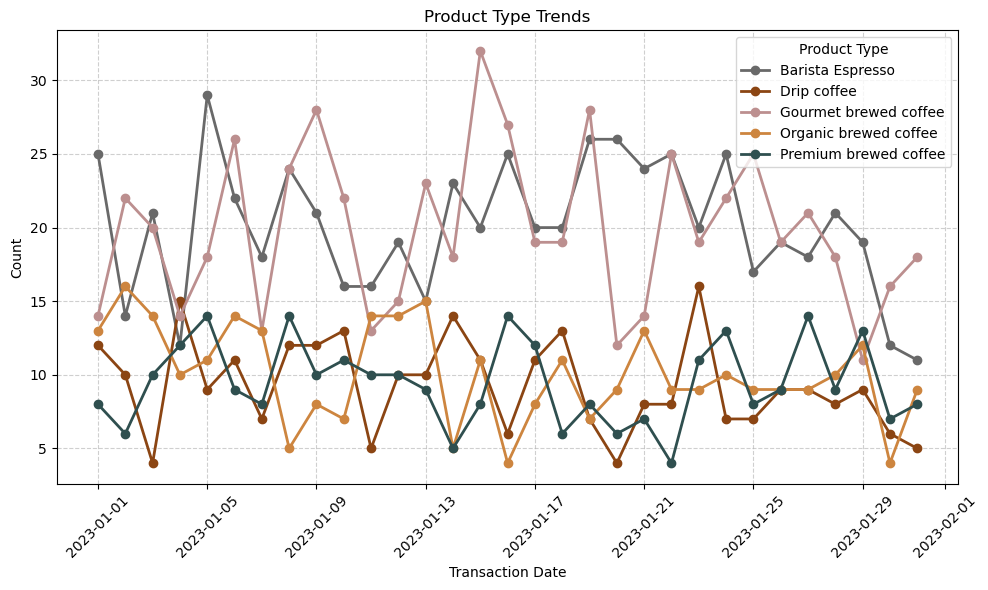

In [239]:
plt.figure(figsize=(10, 6))

# Use a good colormap for distinct colors
colors = [
     "dimgray",       # deep grey
    "saddlebrown",   # rich brown
    "rosybrown",     # soft brownish-pink    
    "peru",          # warm brown-orange
    "darkslategray", # grey with blue tone
    "tan",           # muted beige
    "slategray",     # cool grey
    "chocolate"    # Cyan
]

for i, category in enumerate(x['product_type'].unique()):
    subset = x[x['product_type'] == category].sort_values("transaction_date")
    plt.plot(
        subset['transaction_date'],
        subset['count'],
        color=colors[i % len(colors)],   # line color
        marker='o',                      # circle points
        linestyle='-',                   # solid line
        linewidth=2,
        markersize=6,
        label=category
    )

plt.xlabel("Transaction Date")
plt.ylabel("Count")
plt.title("Product Type Trends")
plt.xticks(rotation=45)
plt.legend(title="Product Type")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [240]:
sales= df.groupby(df.transaction_date.dt.to_period('W'))['sales'].sum()
mov_avg=sales.rolling(window=2).mean()
mov_avg

transaction_date
2022-12-26/2023-01-01          NaN
2023-01-02/2023-01-08     9823.765
2023-01-09/2023-01-15    18134.430
2023-01-16/2023-01-22    19474.020
2023-01-23/2023-01-29    19045.070
2023-01-30/2023-02-05    17751.610
2023-02-06/2023-02-12    17782.470
2023-02-13/2023-02-19    19094.985
2023-02-20/2023-02-26    19959.845
2023-02-27/2023-03-05    20226.410
2023-03-06/2023-03-12    21268.045
2023-03-13/2023-03-19    22870.465
2023-03-20/2023-03-26    23494.945
2023-03-27/2023-04-02    22725.425
2023-04-03/2023-04-09    24067.720
2023-04-10/2023-04-16    27530.595
2023-04-17/2023-04-23    29099.405
2023-04-24/2023-04-30    28302.070
2023-05-01/2023-05-07    29748.365
2023-05-08/2023-05-14    34083.490
2023-05-15/2023-05-21    37266.715
2023-05-22/2023-05-28    37540.835
2023-05-29/2023-06-04    35259.765
2023-06-05/2023-06-11    35685.835
2023-06-12/2023-06-18    39386.600
2023-06-19/2023-06-25    41040.400
2023-06-26/2023-07-02    33638.690
Freq: W-SUN, Name: sales, dtype: float

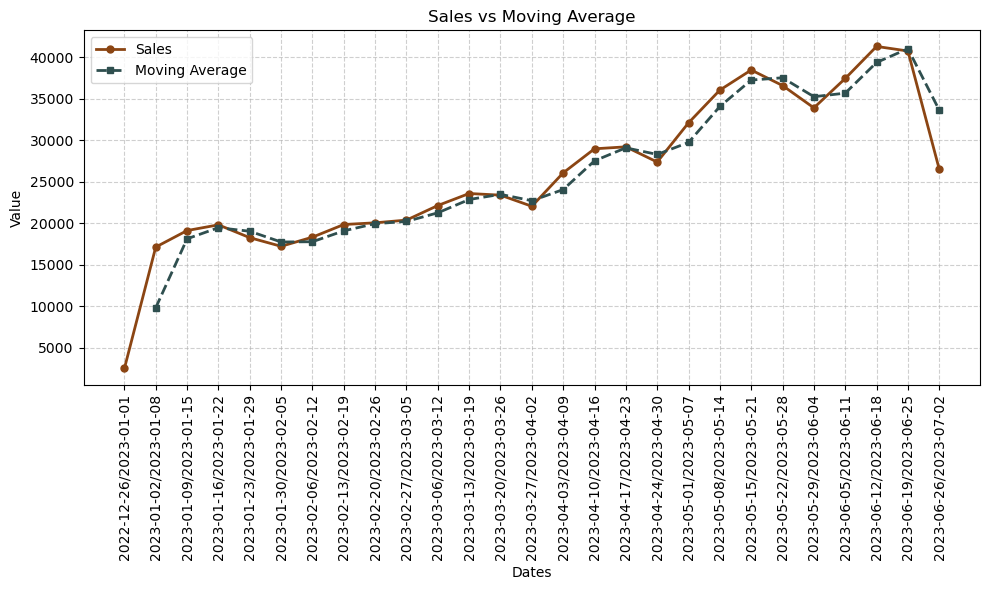

In [241]:
plt.figure(figsize=(10, 6))
# Plot sales in earthy brown
plt.plot(
    sales.index.astype(str), sales.values,
    color="saddlebrown",       # brown tone
    marker="o",                # circle points
    linestyle="-",             # solid line
    linewidth=2,
    markersize=5,
    label="Sales"
)

# Plot moving average in muted gray-blue
plt.plot(
    mov_avg.index.astype(str), mov_avg.values,
    color="darkslategray",     # gray-blue
    marker="s",                # square points
    linestyle="--",            # dashed line
    linewidth=2,
    markersize=5,
    label="Moving Average"
)

plt.xticks(rotation=90)
plt.xlabel("Dates")
plt.ylabel("Value")
plt.title("Sales vs Moving Average")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

In [242]:
april

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,sales,month_name,week_name
54902,55013,2023-04-01,07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.00,April,Saturday
54903,55014,2023-04-01,07:07:09,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.00,April,Saturday
54904,55015,2023-04-01,07:07:19,1,5,Lower Manhattan,61,4.75,Drinking Chocolate,Hot chocolate,Sustainably Grown Organic Lg,4.75,April,Saturday
54905,55016,2023-04-01,07:09:09,1,5,Lower Manhattan,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,3.00,April,Saturday
54906,55017,2023-04-01,07:09:59,2,5,Lower Manhattan,61,4.75,Drinking Chocolate,Hot chocolate,Sustainably Grown Organic Lg,9.50,April,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80232,80406,2023-04-30,19:58:35,1,3,Astoria,37,3.00,Coffee,Barista Espresso,Espresso shot,3.00,April,Sunday
80233,80407,2023-04-30,20:32:15,2,8,Hell's Kitchen,33,3.50,Coffee,Gourmet brewed coffee,Ethiopia Lg,7.00,April,Sunday
80234,80408,2023-04-30,20:52:03,1,8,Hell's Kitchen,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,4.50,April,Sunday
80235,80409,2023-04-30,20:57:11,2,8,Hell's Kitchen,60,3.75,Drinking Chocolate,Hot chocolate,Sustainably Grown Organic Rg,7.50,April,Sunday


In [243]:
monsales = df.groupby(df.transaction_date.dt.to_period("M"))["sales"].sum()
monthly_growth = monsales.pct_change() * 100
print(monthly_growth)


transaction_date
2023-01          NaN
2023-02    -6.773633
2023-03    29.797667
2023-04    20.343466
2023-05    31.769242
2023-06     6.226159
Freq: M, Name: sales, dtype: float64


<Axes: xlabel='transaction_date'>

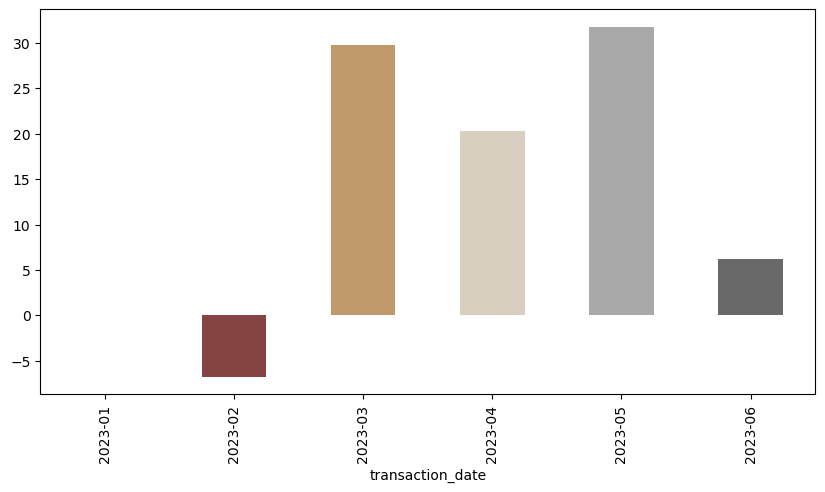

In [244]:
monthly_growth.plot(kind='bar',figsize=(10,5), color= [
    "#4B3832",  # deep brown
    "#854442",  # warm reddish brown
    "#C19A6B",  # light brown / tan
    "#D9CFC1",  # beige grey
    "#A9A9A9",  # medium grey
    "#696969",  # dim grey
    "#404040"   # dark grey
])

In [245]:
janu=df[df.transaction_date.dt.strftime('%B')=='January']
jasales= jan.groupby(jan.transaction_date.dt.to_period('W'))['sales'].sum()
jamonthly_growth=jasales.pct_change()*100
jamonthly_growth

transaction_date
2022-12-26/2023-01-01           NaN
2023-01-02/2023-01-08    583.331871
2023-01-09/2023-01-15     11.611889
2023-01-16/2023-01-22      3.601657
2023-01-23/2023-01-29     -7.805229
2023-01-30/2023-02-05    -73.672081
Freq: W-SUN, Name: sales, dtype: float64

<Axes: xlabel='transaction_date'>

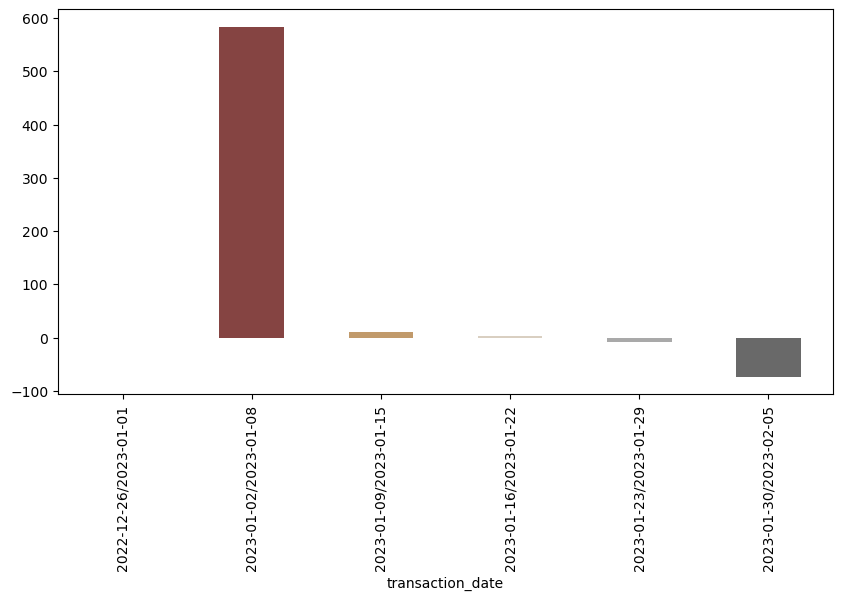

In [249]:
jamonthly_growth.plot(kind='bar',figsize=(10,5), color= [
    "#4B3832",  # deep brown
    "#854442",  # warm reddish brown
    "#C19A6B",  # light brown / tan
    "#D9CFC1",  # beige grey
    "#A9A9A9",  # medium grey
    "#696969",  # dim grey
    "#404040"   # dark grey
])

In [270]:
aprils=df[df.transaction_date.dt.strftime('%B')=='April']
asales= april.groupby(april.transaction_date.dt.to_period('D'))['sales'].sum()
amonthly_growth=asales.pct_change()*100
amonthly_growth

transaction_date
2023-04-01          NaN
2023-04-02    -3.352793
2023-04-03     0.813793
2023-04-04    -7.701910
2023-04-05     6.774261
2023-04-06    -8.514651
2023-04-07    13.309950
2023-04-08    24.173455
2023-04-09   -10.587659
2023-04-10     3.214083
2023-04-11    -8.706490
2023-04-12     4.861843
2023-04-13     1.840265
2023-04-14     0.406365
2023-04-15    -0.228986
2023-04-16     9.185330
2023-04-17    -3.739454
2023-04-18     0.507144
2023-04-19    -0.821301
2023-04-20    -9.113056
2023-04-21     2.053618
2023-04-22    -1.093529
2023-04-23     9.079963
2023-04-24    -1.292207
2023-04-25    -0.244992
2023-04-26     7.155112
2023-04-27    -2.902762
2023-04-28   -23.792099
2023-04-29   -12.457763
2023-04-30    20.275267
Freq: D, Name: sales, dtype: float64

<Axes: xlabel='transaction_date'>

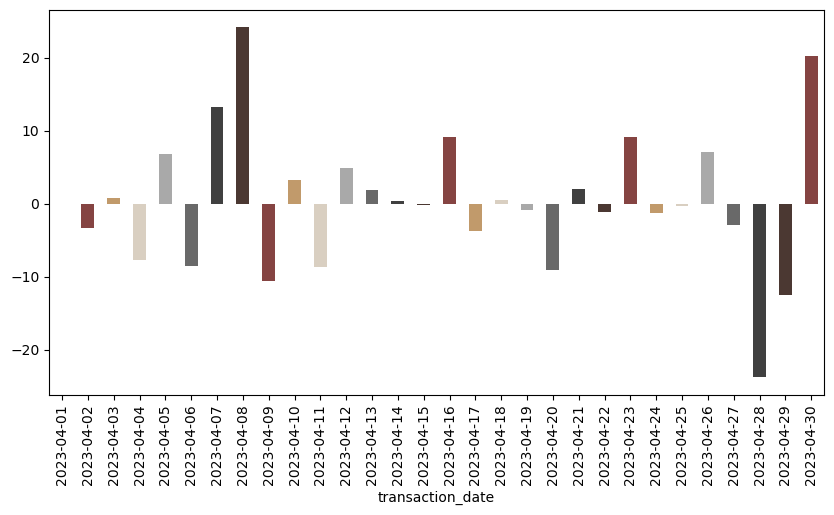

In [272]:
amonthly_growth.plot(kind='bar',figsize=(10,5), color= [
    "#4B3832",  # deep brown
    "#854442",  # warm reddish brown
    "#C19A6B",  # light brown / tan
    "#D9CFC1",  # beige grey
    "#A9A9A9",  # medium grey
    "#696969",  # dim grey
    "#404040"   # dark grey
])

In [273]:
june=df[df.transaction_date.dt.strftime('%B')=='June']
sales= june.groupby(june.transaction_date.dt.to_period('D'))['sales'].sum()
monthly_growth=sales.pct_change()*100
monthly_growth

transaction_date
2023-06-01          NaN
2023-06-02    -3.261909
2023-06-03     2.178384
2023-06-04    -3.512915
2023-06-05    -1.484409
2023-06-06    -6.357981
2023-06-07     6.179739
2023-06-08    25.977146
2023-06-09    -4.623683
2023-06-10    -4.097553
2023-06-11    -3.699116
2023-06-12    -1.659282
2023-06-13    16.151407
2023-06-14    -5.700751
2023-06-15    -0.518802
2023-06-16     3.533957
2023-06-17     1.766136
2023-06-18    -1.495848
2023-06-19     6.269737
2023-06-20   -14.198357
2023-06-21     5.709543
2023-06-22    -3.327606
2023-06-23     2.969849
2023-06-24     2.148789
2023-06-25    -2.560912
2023-06-26     2.103443
2023-06-27     1.697612
2023-06-28   -20.863839
2023-06-29    -5.881918
2023-06-30    23.154974
Freq: D, Name: sales, dtype: float64

<Axes: xlabel='transaction_date'>

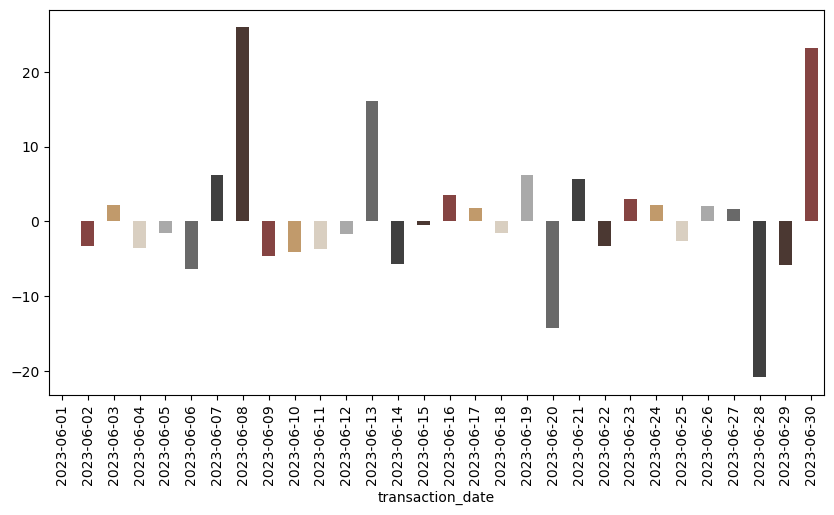

In [275]:
monthly_growth.plot(kind='bar',figsize=(10,5), color= [
    "#4B3832",  # deep brown
    "#854442",  # warm reddish brown
    "#C19A6B",  # light brown / tan
    "#D9CFC1",  # beige grey
    "#A9A9A9",  # medium grey
    "#696969",  # dim grey
    "#404040"   # dark grey
])

## module 3

In [277]:
hell.sales.sum()

236511.16999999998

In [278]:
lm.sales.sum()

230057.25

In [279]:
asto.sales.sum()

232243.91000000003

In [281]:
hell.transaction_id.nunique()

50735

In [282]:
lm.transaction_id.nunique()

47782

In [289]:
asto.transaction_id.nunique()

50599

In [291]:
hell.transaction_qty.mean()

1.4139548635064552

In [293]:
lm.transaction_qty.mean()

1.5014440584320456

In [295]:
asto.transaction_qty.mean()

1.4030119172315658

In [297]:
hell.unit_price.mean()

3.3942183896718237

In [299]:
df

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,sales,month_name,week_name
0,1,2023-01-01,1900-01-01 07:06:11,2,5,Lower Manhattan,32,3.00,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.00,January,Sunday
1,2,2023-01-01,1900-01-01 07:08:56,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,January,Sunday
2,3,2023-01-01,1900-01-01 07:14:04,2,5,Lower Manhattan,59,4.50,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.00,January,Sunday
3,4,2023-01-01,1900-01-01 07:20:24,1,5,Lower Manhattan,22,2.00,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.00,January,Sunday
4,5,2023-01-01,1900-01-01 07:22:41,2,5,Lower Manhattan,57,3.10,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.20,January,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149452,2023-06-30,1900-01-01 20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg,5.00,June,Friday
149112,149453,2023-06-30,1900-01-01 20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg,6.00,June,Friday
149113,149454,2023-06-30,1900-01-01 20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg,3.00,June,Friday
149114,149455,2023-06-30,1900-01-01 20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino,3.75,June,Friday


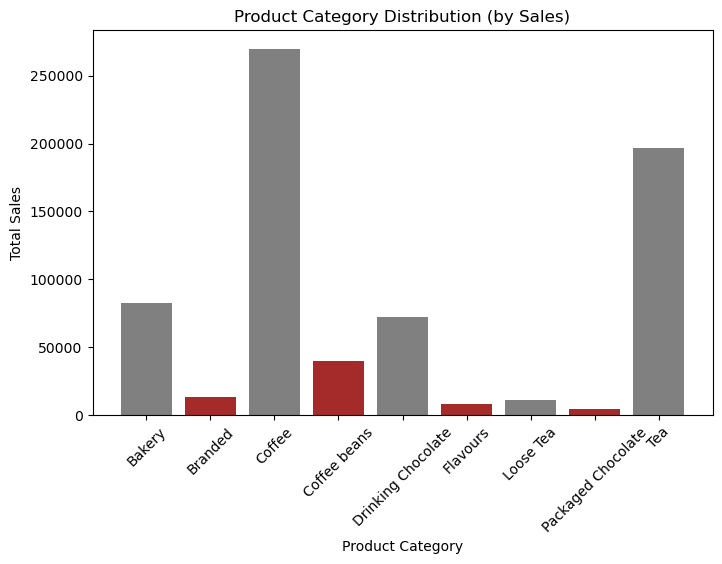

In [301]:
category_sales = df.groupby('product_category')['sales'].sum().reset_index()
plt.figure(figsize=(8,5))
plt.bar(category_sales['product_category'], category_sales['sales'],color=['grey', 'brown'])
plt.title("Product Category Distribution (by Sales)")
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

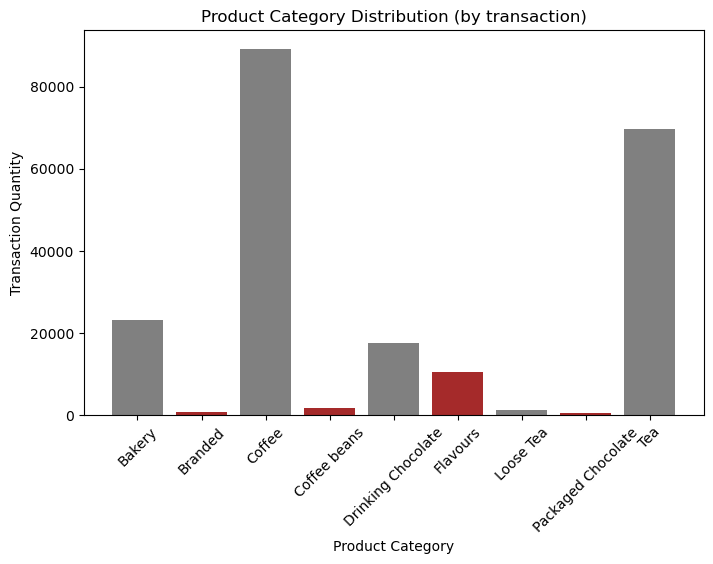

In [340]:
plt.figure(figsize=(10, 6))
transaction_sales = df.groupby('product_category')['transaction_qty'].sum().reset_index()
plt.figure(figsize=(8,5))
plt.bar(transaction_sales['product_category'], transaction_sales['transaction_qty'], color=['grey', 'brown'])
plt.title("Product Category Distribution (by transaction)")
plt.xlabel("Product Category")
plt.ylabel("Transaction Quantity")
plt.xticks(rotation=45)
plt.show()

In [356]:
pro_pie = df.groupby(['product_category', 'product_type'])['sales'].sum()

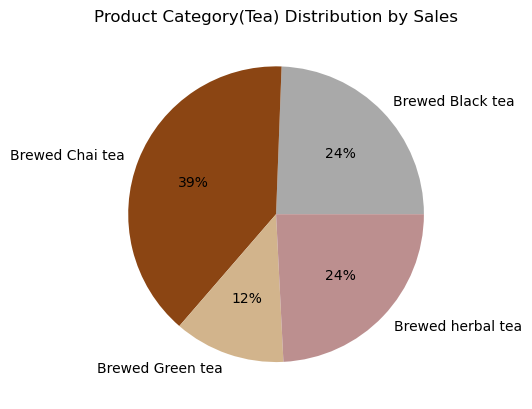

In [388]:
colors = ['#A9A9A9', '#8B4513', '#D2B48C', '#BC8F8F','brown'] 
plt.pie(pro_pie['Tea'].values, labels=pro_pie['Tea'].index.astype(str), autopct='%d%%',  colors=colors)
plt.title("Product Category(Tea) Distribution by Sales")
plt.show()

In [380]:
tr_pie = df.groupby(['product_category', 'product_type'])['sales'].sum()

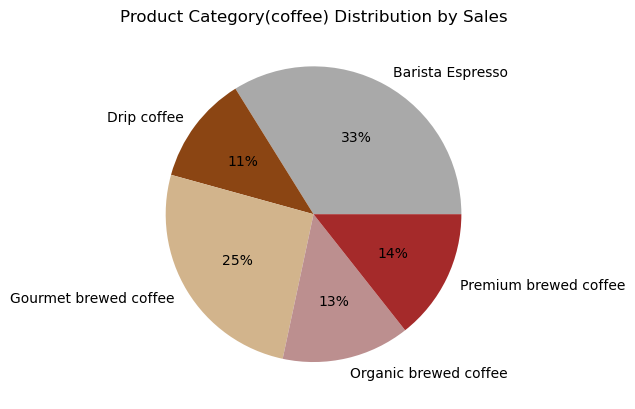

In [390]:
colors = ['#A9A9A9', '#8B4513', '#D2B48C', '#BC8F8F','brown']
plt.pie(tr_pie['Coffee'].values, labels=tr_pie['Coffee'].index.astype(str), autopct='%d%%',  colors=colors)
plt.title("Product Category(coffee) Distribution by Sales")
plt.show()

In [384]:
es_pie = df.groupby(['product_category', 'product_type'])['sales'].sum()

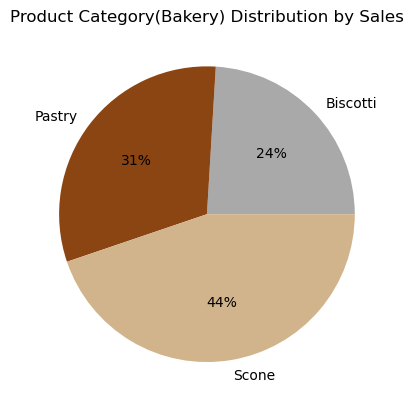

In [392]:
colors = ['#A9A9A9', '#8B4513', '#D2B48C', '#BC8F8F','brown']
plt.pie(es_pie['Bakery'].values, labels=es_pie['Bakery'].index.astype(str), autopct='%d%%',  colors=colors)
plt.title("Product Category(Bakery) Distribution by Sales")
plt.show()

In [313]:
top_selling = df.groupby('product_type')['sales'].sum().nlargest().reset_index()
top_selling

,product_type,sales
0,Barista Espresso,91406.20
1,Brewed Chai tea,77081.95
2,Hot chocolate,72416.00
3,Gourmet brewed coffee,70034.60
4,Brewed Black tea,47932.00


In [372]:
top_selling = df.groupby('product_type')['transaction_qty'].sum().nlargest(10).reset_index()
top_selling

,product_type,transaction_qty
0,Brewed Chai tea,26250
1,Gourmet brewed coffee,25973
2,Barista Espresso,24943
3,Brewed Black tea,17462
4,Hot chocolate,17457
5,Brewed herbal tea,17328
6,Organic brewed coffee,13012
7,Drip coffee,12891
8,Premium brewed coffee,12431
9,Scone,10465


In [317]:
import calendar

week_name
Monday       3910.664615
Tuesday      3825.228462
Wednesday    3858.213077
Thursday     3875.683846
Friday       3898.961538
Saturday     3875.779200
Sunday       3781.935000
Name: sales, dtype: float64

<BarContainer object of 7 artists>

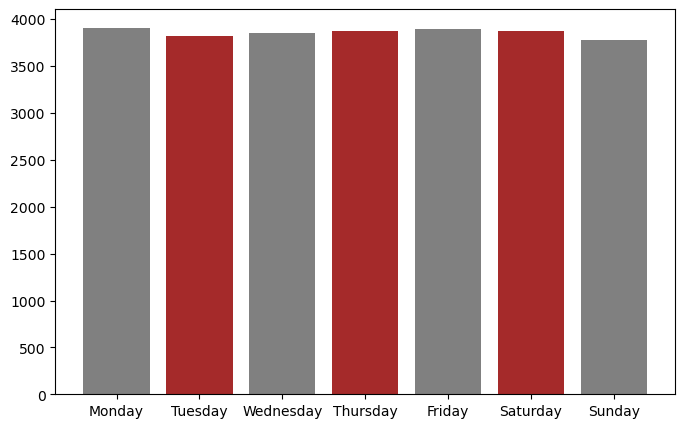

In [342]:
plt.figure(figsize=(8, 5))
daily_analysis = df.groupby([df["transaction_date"].dt.date, 'week_name'])['sales'].sum().reset_index()
avg_daily_analysis = daily_analysis.groupby('week_name')['sales'].mean()
avg_daily_analysis = avg_daily_analysis.reindex(list(calendar.day_name))
display(avg_daily_analysis)
plt.bar(avg_daily_analysis.index, avg_daily_analysis.values , color=["grey", "brown"])

In [321]:
df['hour']=pd.to_datetime(df.transaction_time).dt.hour
df['hour']

0          7
1          7
2          7
3          7
4          7
          ..
149111    20
149112    20
149113    20
149114    20
149115    20
Name: hour, Length: 149116, dtype: int32

C:\Users\Mohit\AppData\Local\Temp\ipykernel_1600\1099959496.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
C:\Users\Mohit\AppData\Local\Temp\ipykernel_1600\1099959496.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


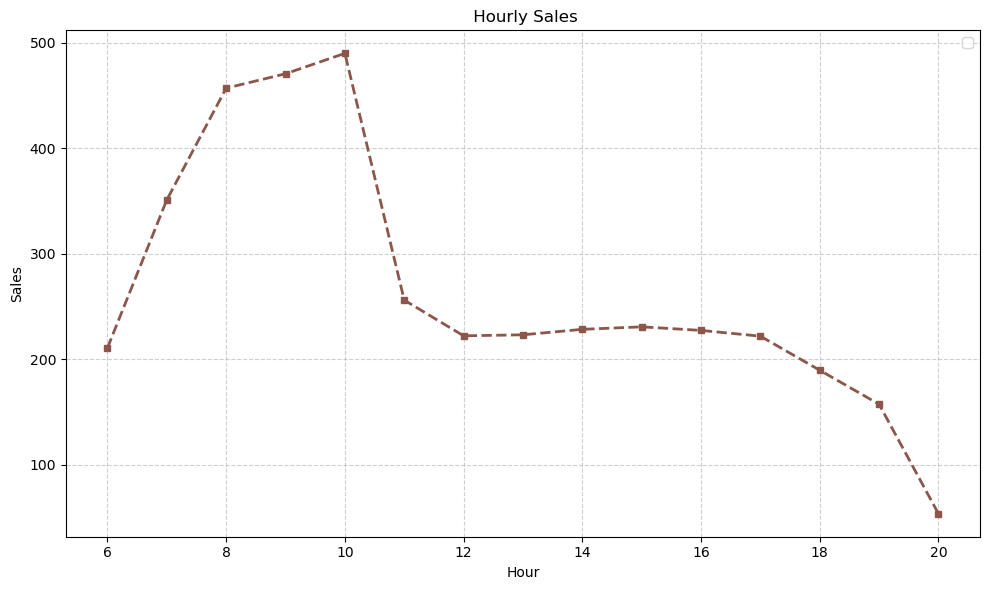

In [332]:
plt.figure(figsize=(10, 6))
hourly_analysis = df.groupby([df.transaction_date.dt.date, 'hour'])['sales'].sum().reset_index()
avg_hourly_analysis = hourly_analysis.groupby('hour') ['sales'].mean()
plt.plot(avg_hourly_analysis.index, avg_hourly_analysis.values, color='#8c564b',  marker="s",                # square points
    linestyle="--",            # dashed line
    linewidth=2,
    markersize=5,)

plt.legend()
plt.xlabel("Hour")
plt.ylabel("Sales")
plt.title(" Hourly Sales")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

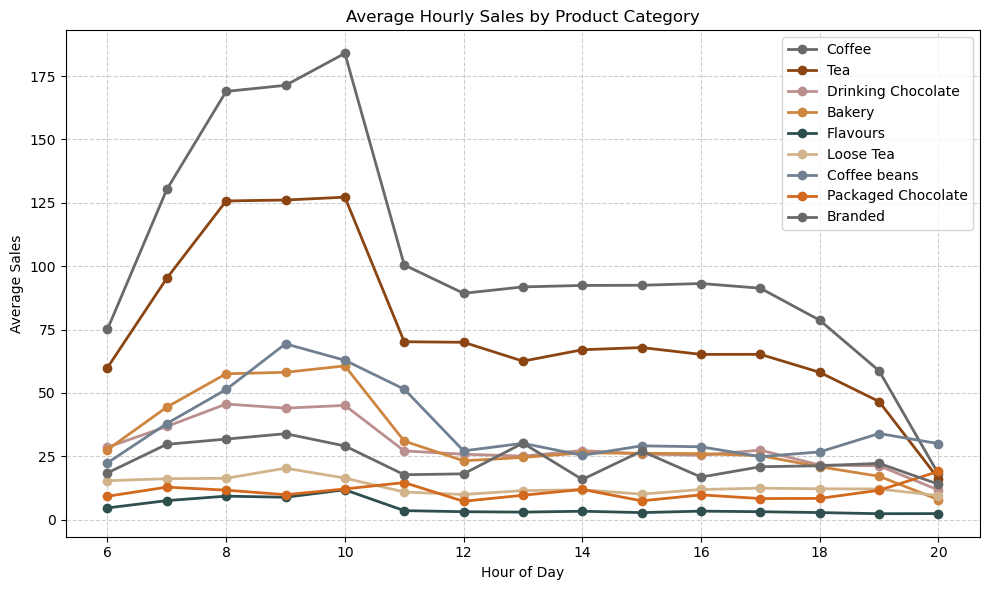

In [336]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
colors = [
    "dimgray",       # deep grey
    "saddlebrown",   # rich brown
    "rosybrown",     # soft brownish-pink    
    "peru",          # warm brown-orange
    "darkslategray", # grey with blue tone
    "tan",           # muted beige
    "slategray",     # cool grey
    "chocolate"      # warm brown
]

for idx, i in enumerate(df.product_category.unique()):
    category = df[df.product_category == i]
    
    hourly_analysis = category.groupby(
        [category.transaction_date.dt.date, 'hour']
    )['sales'].sum().reset_index()
    
    avg_hourly_analysis = hourly_analysis.groupby('hour')['sales'].mean()
    
    plt.plot(
        avg_hourly_analysis.index,
        avg_hourly_analysis.values,
        color=colors[idx % len(colors)],  # cycle colors
        marker='o',
        linestyle='-',
        linewidth=2,
        markersize=6,
        label=i
    )

plt.legend()
plt.xlabel("Hour of Day")
plt.ylabel("Average Sales")
plt.title("Average Hourly Sales by Product Category")
plt.savefig("category_hour.png", dpi=300, bbox_inches="tight") 
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()# save first
plt.show()
